In [2]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from pandas import read_csv, datetime
# from pandas.tools.plotting import autocorrelation_plot
from pandas.plotting import autocorrelation_plot
from dateutil.relativedelta import relativedelta 
from scipy.optimize import minimize              
import statsmodels.formula.api as smf            
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from sklearn.linear_model import LassoCV, RidgeCV
from itertools import product                    
from tqdm import tqdm #_notebook
import matplotlib.dates as mdates
%matplotlib inline

import warnings                                
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose


# import glob
# import csv
# import numpy as np
# import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# import pandas as pd


import datetime

# import matplotlib.pyplot as plt

import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
plt.style.use('seaborn-white')

<ipython-input-2-085a51cf0ed1>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import read_csv, datetime


In [3]:
import matplotlib.ticker as ticker

In [4]:
# Handling Pnadas 0.25 version 
pd.plotting.register_matplotlib_converters()

In [5]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [6]:
# Read data

In [7]:
server_name = 'SRV-FR-SQLN-04:BFC'
processed_data_path = '/home/ubuntu/Zabbix/Data/SRV_Data/SRV_Processed/' + str(server_name).replace(":","") + "_Processed" + '.csv'

In [8]:
df = pd.read_csv(processed_data_path)

In [9]:
df.head(2)

,Timestamp,"SQL Server, Errors: Errors/sec (DB Offline Errors)",SQL Server working set,Incoming network traffic on Amazon Elastic Network Adapter,"SQL Server, Access Methods: Forwarded Records per second","SQL Server, Buffer Manager: Lazy writes/sec","SQL Server, Buffer Manager: Read-ahead pages/sec","SQL Server, Cache: Cache Object Counts","SQL Server, Cache: Cache Hit Ratio","SQL Server, Cache: Cache Objects in use",...,"SQL Server, Errors: Errors/sec (Kill Connection Errors)","SQL Server, Memory Manager: Total Server Memory","SQL Server, Access Methods: Full Scans/sec",Processor load (15 min average),"SQL Server, Locks: Lock Requests/sec (Total)","SQL Server, Latches: Average Latch Wait Time","SQL Server, Statistics: Failed Auto-Params/sec","SQL Server, Buffer Manager: % Buffer cache hit ratio","SQL Server, Memory Manager: Maximum Workspace Memory","SQL Server, Access Methods: Work files created/sec"
0,2020-06-16 05:17:00,0.0,135592000.0,30056.0,0.0,0.0,0.0,139.0,80.043,1.0,...,0.0,1.115221e+10,0.0,0.0592,58.0909,0.0,0.0,100.0,1.011683e+10,0.0
1,2020-06-16 05:18:00,0.0,135592000.0,46176.0,0.0,0.0,0.0,139.0,80.043,1.0,...,0.0,1.115223e+10,0.0,0.0583,53.1690,0.0,0.0,100.0,1.011683e+10,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45553 entries, 0 to 45552
Data columns (total 84 columns):
 #   Column                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                   --------------  -----  
 0   Timestamp                                                                                                45553 non-null  object 
 1   SQL Server, Errors: Errors/sec (DB Offline Errors)                                                       45509 non-null  float64
 2   SQL Server working set                                                                                   45062 non-null  float64
 3   Incoming network traffic on Amazon Elastic Network Adapter                                               45534 non-null  float64
 4   SQL Server, Access Methods: Forwarded Records per second                          

In [11]:
df.isnull().sum().sum()

420845

In [12]:
# Missing Value Treatment
df = df.set_index('Timestamp').fillna(df.mean())
print(df.isnull().sum())

SQL Server, Errors: Errors/sec (DB Offline Errors)            0
SQL Server working set                                        0
Incoming network traffic on Amazon Elastic Network Adapter    0
SQL Server, Access Methods: Forwarded Records per second      0
SQL Server, Buffer Manager: Lazy writes/sec                   0
                                                             ..
SQL Server, Latches: Average Latch Wait Time                  0
SQL Server, Statistics: Failed Auto-Params/sec                0
SQL Server, Buffer Manager: % Buffer cache hit ratio          0
SQL Server, Memory Manager: Maximum Workspace Memory          0
SQL Server, Access Methods: Work files created/sec            0
Length: 83, dtype: int64


In [13]:
df.isnull().sum().sum()

0

In [14]:
df.index.name

'Timestamp'

In [15]:
df.index.rename('Date_Time', inplace = True)

In [16]:
df.head(2)

,"SQL Server, Errors: Errors/sec (DB Offline Errors)",SQL Server working set,Incoming network traffic on Amazon Elastic Network Adapter,"SQL Server, Access Methods: Forwarded Records per second","SQL Server, Buffer Manager: Lazy writes/sec","SQL Server, Buffer Manager: Read-ahead pages/sec","SQL Server, Cache: Cache Object Counts","SQL Server, Cache: Cache Hit Ratio","SQL Server, Cache: Cache Objects in use","SQL Server, Locks: Lock Wait Time (Total)",...,"SQL Server, Errors: Errors/sec (Kill Connection Errors)","SQL Server, Memory Manager: Total Server Memory","SQL Server, Access Methods: Full Scans/sec",Processor load (15 min average),"SQL Server, Locks: Lock Requests/sec (Total)","SQL Server, Latches: Average Latch Wait Time","SQL Server, Statistics: Failed Auto-Params/sec","SQL Server, Buffer Manager: % Buffer cache hit ratio","SQL Server, Memory Manager: Maximum Workspace Memory","SQL Server, Access Methods: Work files created/sec"
Date_Time,,,,,,,,,,,,,,,,,,,,,
2020-06-16 05:17:00,0.0,135592000.0,30056.0,0.0,0.0,0.0,139.0,80.043,1.0,0.0,...,0.0,1.115221e+10,0.0,0.0592,58.0909,0.0,0.0,100.0,1.011683e+10,0.0
2020-06-16 05:18:00,0.0,135592000.0,46176.0,0.0,0.0,0.0,139.0,80.043,1.0,0.0,...,0.0,1.115223e+10,0.0,0.0583,53.1690,0.0,0.0,100.0,1.011683e+10,0.0


In [17]:
df.reset_index(inplace = True)

In [18]:
print('The time series starts from: ', df.Date_Time.min())
print('The time series ends on: ', df.Date_Time.max())

The time series starts from:  2020-06-16 05:17:00
The time series ends on:  2020-07-18 07:44:00


# Selected Features Line Graph

In [44]:
df.set_index('Date_Time', inplace = True)

In [19]:
# Features List

In [37]:
features_list = ['Free memory',
'SQL Server, Memory Manager: Target Server Memory',
'Free disk space on E:',
'SQL Server working set',
'Incoming network traffic on Amazon Elastic Network Adapter',
'Free disk space on I:',
'SQL Server, Memory Manager: Memory Grants Outstanding',
'SQL Server pf',
'Incoming network traffic on Amazon Elastic Network Adapter-WFP 802.3 MAC Layer LightWeight Filter-0000',
'SQL Server, Memory Manager: Total Server Memory',
'SQL Server, Buffer Manager: Target pages',
'SQL Server, Access Methods: Index Searches/sec',
'SQL Server, Buffer Manager: Database pages',
'SQL Server, Cache: Cache Pages',
'Incoming network traffic on Amazon Elastic Network Adapter-WFP Native MAC Layer LightWeight Filter-0000',
'Processor load (15 min average)',
'SQL Server vmsize',
'Outgoing network traffic on Amazon Elastic Network Adapter-WFP 802.3 MAC Layer LightWeight Filter-0000',
'Processor load (5 min average)',
'SQL Server, Access Methods: Page Splits/sec',
'Outgoing network traffic on Amazon Elastic Network Adapter-WFP Native MAC Layer LightWeight Filter-0000',
'Outgoing network traffic on Amazon Elastic Network Adapter',
]

In [52]:
# Subsetting df for features only --> df_feat
# Index in df is 'Date_Time'

In [66]:
df_feat = df[features_list]

In [67]:
df_feat.shape

(45553, 22)

In [68]:
df_feat.index.name

'Date_Time'

In [23]:
# Plot line Graph for all features 
# df_feat

In [25]:
# ax1 = #df_feat.plot.line(figsize = (100,20),linewidth=2.5, fontsize=20)
# ax1 = plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# ax1.set_xticks(df_feat.index)
# df_feat.plot.line(figsize = (100,20),linewidth=2.5, fontsize=20)
# plt.show()

#----------
# ax=plt.gca()
# ax.set_xticks(df_feat.index)

# xfmt = mdates.DateFormatter('%M:%S:%f')
# ax.xaxis.set_major_formatter(xfmt)
# df_feat['SQL Server, Memory Manager: Target Server Memory'].plot()

#-----------

# ax= plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator()) #plt.gca()
# ax.set_xticks(df_feat.index)


# xfmt = dates.DateFormatter('%M:%S:%f')
# ax.xaxis.set_major_formatter(xfmt)
# df_feat.reset_index(inplace = True)



###########



In [50]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45553 entries, 2020-06-16 05:17:00 to 2020-07-18 07:44:00
Data columns (total 22 columns):
 #   Column                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                   --------------  -----  
 0   Free memory                                                                                              45553 non-null  float64
 1   SQL Server, Memory Manager: Target Server Memory                                                         45553 non-null  float64
 2   Free disk space on E:                                                                                    45553 non-null  float64
 3   SQL Server working set                                                                                   45553 non-null  float64
 4   Incoming network traffic on Amazon Elastic Network Adap

In [27]:
# df_feat.set_index('Date_Time', inplace = True)

In [28]:
# ax = df_feat.plot.line(figsize = (100,20),linewidth=2.5, fontsize=20)
# ticklabels = df_feat.index.strftime('%Y-%m-%d')
# ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
# ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
# plt.show()

In [51]:
# print(df_feat.info())
# df_feat = df_feat.drop('index', 1)
# print(df_feat.info())

In [52]:
df_feat.index.name

'Date_Time'

# Scaling Data

#### Standard Scaling -Part

In [129]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()

In [71]:
scaler.fit(df_feat)

StandardScaler()

In [72]:
df_feat_scaled = scaler.transform(df_feat)

In [73]:
df_feat_scaled.shape

(45553, 22)

In [75]:
df_feat_scaled[0:5,0:2]

array([[-1.36362041, -3.9613845 ],
       [-1.36302958, -3.9613845 ],
       [-1.36317367, -3.9613845 ],
       [-1.36293975, -3.9613845 ],
       [-1.36290779, -3.9613845 ]])

In [88]:
len(df_feat.columns)

22

In [83]:
features_list[0]

'Free memory'

In [90]:
# DataFrame having only scaled value

df_scaled_22 = pd.DataFrame(data = df_feat_scaled, columns = features_list, index = df.index)

In [91]:
df_scaled_22.shape

(45553, 22)

In [92]:
df_scaled_22.head()

,Free memory,"SQL Server, Memory Manager: Target Server Memory",Free disk space on E:,SQL Server working set,Incoming network traffic on Amazon Elastic Network Adapter,Free disk space on I:,"SQL Server, Memory Manager: Memory Grants Outstanding",SQL Server pf,Incoming network traffic on Amazon Elastic Network Adapter-WFP 802.3 MAC Layer LightWeight Filter-0000,"SQL Server, Memory Manager: Total Server Memory",...,"SQL Server, Buffer Manager: Database pages","SQL Server, Cache: Cache Pages",Incoming network traffic on Amazon Elastic Network Adapter-WFP Native MAC Layer LightWeight Filter-0000,Processor load (15 min average),SQL Server vmsize,Outgoing network traffic on Amazon Elastic Network Adapter-WFP 802.3 MAC Layer LightWeight Filter-0000,Processor load (5 min average),"SQL Server, Access Methods: Page Splits/sec",Outgoing network traffic on Amazon Elastic Network Adapter-WFP Native MAC Layer LightWeight Filter-0000,Outgoing network traffic on Amazon Elastic Network Adapter
Date_Time,,,,,,,,,,,,,,,,,,,,,
2020-06-16 05:17:00,-1.363620,-3.961384,0.22969,-0.774851,-0.249347,0.024024,-0.004876,1.175101,-0.249216,-0.970465,...,-0.864389,-1.478638,-0.249000,4.300597,-0.973683,-0.161109,-0.263704,-0.032468,-0.161072,-0.161369
2020-06-16 05:18:00,-1.363030,-3.961384,0.22969,-0.774851,-0.248177,0.024024,-0.004876,1.175348,-0.247840,-0.970462,...,-0.864378,-1.478638,-0.247626,4.230429,-0.973683,-0.161110,-0.234801,-0.032468,-0.161067,-0.161331
2020-06-16 05:19:00,-1.363174,-3.961384,0.22969,-0.774851,-0.249195,0.024024,-0.004876,1.175591,-0.248926,-0.970429,...,-0.864343,-1.478638,-0.248723,3.980944,-0.973683,-0.161066,-0.234801,-0.032468,-0.161032,-0.161363
2020-06-16 05:20:00,-1.362940,-3.961384,0.22969,-0.774851,-0.249209,0.024024,-0.004876,1.175837,-0.249007,-0.970425,...,-0.864343,-1.478638,-0.248780,3.489770,-0.973683,-0.161098,-0.263704,-0.032468,-0.161062,-0.161360
2020-06-16 05:21:00,-1.362908,-3.961384,0.22969,-0.774851,-0.249185,0.024024,-0.004876,1.176080,-0.248909,-0.970425,...,-0.864343,-1.478638,-0.248672,3.474177,-0.973683,-0.161104,-0.263704,-0.032468,-0.161060,-0.161361


In [94]:
# df_scaled_22.to_csv('/home/ubuntu/Zabbix/Data/SRV_Data/SRV_CORR_ANALYSIS/FEATURES/SRV_FR_SQLN_03_BFC_Feat_Scaled_22.csv')

In [100]:
df_scaled_22.index = pd.to_datetime(df_scaled_22.index)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


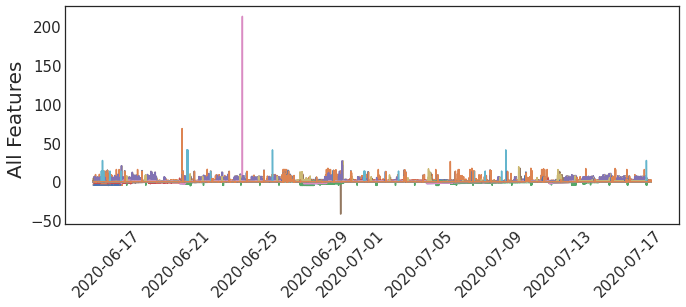

In [101]:
plt.plot(df_scaled_22.index, df_scaled_22)  #df_feat.columns.values)
plt.ylabel(('All Features '), fontsize=20);#$e^{7}$
plt.tick_params(labelsize=15)
plt.xticks(rotation=45)

plt.legend(loc="best", fontsize =14)

plt.legend(loc="best", fontsize =14)
plt.ticklabel_format(axis = 'y', style = 'sci', scilimits = (1,6))
plt.show()

In [ ]:
## MinMax Scaler


In [106]:
# df_feat_scaled
df_scaled_22.describe()

,Free memory,"SQL Server, Memory Manager: Target Server Memory",Free disk space on E:,SQL Server working set,Incoming network traffic on Amazon Elastic Network Adapter,Free disk space on I:,"SQL Server, Memory Manager: Memory Grants Outstanding",SQL Server pf,Incoming network traffic on Amazon Elastic Network Adapter-WFP 802.3 MAC Layer LightWeight Filter-0000,"SQL Server, Memory Manager: Total Server Memory",...,"SQL Server, Buffer Manager: Database pages","SQL Server, Cache: Cache Pages",Incoming network traffic on Amazon Elastic Network Adapter-WFP Native MAC Layer LightWeight Filter-0000,Processor load (15 min average),SQL Server vmsize,Outgoing network traffic on Amazon Elastic Network Adapter-WFP 802.3 MAC Layer LightWeight Filter-0000,Processor load (5 min average),"SQL Server, Access Methods: Page Splits/sec",Outgoing network traffic on Amazon Elastic Network Adapter-WFP Native MAC Layer LightWeight Filter-0000,Outgoing network traffic on Amazon Elastic Network Adapter
count,4.555300e+04,4.555300e+04,4.555300e+04,4.555300e+04,4.555300e+04,4.555300e+04,4.555300e+04,4.555300e+04,4.555300e+04,4.555300e+04,...,4.555300e+04,4.555300e+04,4.555300e+04,4.555300e+04,4.555300e+04,4.555300e+04,4.555300e+04,4.555300e+04,4.555300e+04,4.555300e+04
mean,-9.982819e-18,3.394158e-16,3.469030e-16,6.688489e-16,-2.495705e-18,-3.471127e-10,2.261732e-18,1.896736e-16,-7.487114e-18,1.996564e-17,...,-2.395877e-16,-6.239262e-16,1.996564e-17,2.994846e-17,-5.091238e-16,1.622208e-17,-2.246134e-17,3.743557e-18,7.487114e-18,-1.746993e-17
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,...,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-1.712227e+00,-5.030013e+00,-5.291677e+00,-2.335321e+00,-2.497238e-01,-4.184535e+01,-4.875815e-03,-1.743927e+00,-2.494697e-01,-2.639157e+00,...,-2.631965e+00,-2.857457e+00,-2.492165e-01,-3.148793e-01,-2.641969e+00,-1.611505e-01,-2.926063e-01,-3.246816e-02,-1.611070e-01,-1.614096e-01
25%,-4.628223e-01,1.251996e-01,2.328899e-01,-6.774632e-01,-2.492371e-01,2.402356e-02,-4.875815e-03,-8.473539e-01,-2.489917e-01,-6.841210e-01,...,-6.684369e-01,-6.297277e-01,-2.487697e-01,-2.681008e-01,-6.885217e-01,-1.610934e-01,-2.926063e-01,-3.246816e-02,-1.610548e-01,-1.613539e-01
50%,-4.046732e-01,1.251996e-01,2.388376e-01,4.825725e-01,-2.478383e-01,2.402356e-02,-4.875815e-03,-3.850830e-02,-2.475838e-01,5.781380e-01,...,5.435846e-01,-1.051069e-01,-2.473769e-01,-2.369152e-01,5.778836e-01,-1.610643e-01,-1.986734e-01,-3.246816e-02,-1.610252e-01,-1.613246e-01
75%,7.069109e-02,1.251996e-01,2.416685e-01,8.035324e-01,-2.081232e-01,2.402356e-02,-4.875815e-03,8.700032e-01,-2.073830e-01,5.781393e-01,...,6.380133e-01,7.667153e-01,-2.069857e-01,-5.759770e-02,5.787217e-01,-1.608068e-01,-5.416128e-02,-3.246816e-02,-1.607677e-01,-1.610679e-01
max,2.676588e+00,3.905489e+00,2.443298e-01,1.106919e+00,2.641847e+01,2.402356e-02,2.134290e+02,1.851542e+00,2.655386e+01,1.698240e+00,...,1.983343e+00,8.720624e+00,2.674121e+01,1.722705e+01,1.682859e+00,1.480479e+01,1.918763e+01,4.119643e+01,1.466378e+01,1.473404e+01


## Applying MinMax Scalling


In [107]:
from sklearn.preprocessing import MinMaxScaler

In [111]:
# data df_feat
df_feat.values.shape

(45553, 22)

In [112]:
scaler = MinMaxScaler()
df_feat_min_max_scaled = scaler.fit_transform(df_feat.values)

In [113]:
df_feat_min_max_scaled.shape

(45553, 22)

In [115]:
# df_feat_min_max_scaled

In [117]:
scaler.data_max_

array([3.05956127e+10, 2.79172874e+10, 5.90089880e+11, 2.01984000e+08,
       3.67425688e+08, 3.76394220e+10, 1.00000000e+00, 9.77349000e+05,
       3.68307968e+08, 2.80737956e+10, 6.38812160e+07, 1.96038480e+03,
       3.25142300e+06, 1.99250000e+04, 3.70232664e+08, 2.25000000e-01,
       2.77651400e+10, 2.14706409e+09, 2.69600000e-01, 2.97010000e+00,
       2.12657634e+09, 2.13768569e+09])

In [118]:
# transforming df for min max scaled

df_scaled_min_max_22 = pd.DataFrame(data = df_feat_min_max_scaled, columns = features_list, index = df.index)

In [119]:
df_scaled_min_max_22.head()

,Free memory,"SQL Server, Memory Manager: Target Server Memory",Free disk space on E:,SQL Server working set,Incoming network traffic on Amazon Elastic Network Adapter,Free disk space on I:,"SQL Server, Memory Manager: Memory Grants Outstanding",SQL Server pf,Incoming network traffic on Amazon Elastic Network Adapter-WFP 802.3 MAC Layer LightWeight Filter-0000,"SQL Server, Memory Manager: Total Server Memory",...,"SQL Server, Buffer Manager: Database pages","SQL Server, Cache: Cache Pages",Incoming network traffic on Amazon Elastic Network Adapter-WFP Native MAC Layer LightWeight Filter-0000,Processor load (15 min average),SQL Server vmsize,Outgoing network traffic on Amazon Elastic Network Adapter-WFP 802.3 MAC Layer LightWeight Filter-0000,Processor load (5 min average),"SQL Server, Access Methods: Page Splits/sec",Outgoing network traffic on Amazon Elastic Network Adapter-WFP Native MAC Layer LightWeight Filter-0000,Outgoing network traffic on Amazon Elastic Network Adapter
Date_Time,,,,,,,,,,,,,,,,,,,,,
2020-06-16 05:17:00,0.079431,0.119594,0.997356,0.45333,0.000014,1.0,0.0,0.811863,0.000009,0.384722,...,0.382981,0.119089,0.000008,0.263111,0.385746,0.000003,0.001484,0.0,0.000002,0.000003
2020-06-16 05:18:00,0.079565,0.119594,0.997356,0.45333,0.000058,1.0,0.0,0.811932,0.000061,0.384723,...,0.382984,0.119089,0.000059,0.259111,0.385746,0.000003,0.002967,0.0,0.000003,0.000005
2020-06-16 05:19:00,0.079532,0.119594,0.997356,0.45333,0.000020,1.0,0.0,0.811999,0.000020,0.384730,...,0.382991,0.119089,0.000018,0.244889,0.385746,0.000006,0.002967,0.0,0.000005,0.000003
2020-06-16 05:20:00,0.079586,0.119594,0.997356,0.45333,0.000019,1.0,0.0,0.812068,0.000017,0.384731,...,0.382991,0.119089,0.000016,0.216889,0.385746,0.000003,0.001484,0.0,0.000003,0.000003
2020-06-16 05:21:00,0.079593,0.119594,0.997356,0.45333,0.000020,1.0,0.0,0.812135,0.000021,0.384731,...,0.382991,0.119089,0.000020,0.216000,0.385746,0.000003,0.001484,0.0,0.000003,0.000003


In [120]:
df_scaled_min_max_22.describe()

,Free memory,"SQL Server, Memory Manager: Target Server Memory",Free disk space on E:,SQL Server working set,Incoming network traffic on Amazon Elastic Network Adapter,Free disk space on I:,"SQL Server, Memory Manager: Memory Grants Outstanding",SQL Server pf,Incoming network traffic on Amazon Elastic Network Adapter-WFP 802.3 MAC Layer LightWeight Filter-0000,"SQL Server, Memory Manager: Total Server Memory",...,"SQL Server, Buffer Manager: Database pages","SQL Server, Cache: Cache Pages",Incoming network traffic on Amazon Elastic Network Adapter-WFP Native MAC Layer LightWeight Filter-0000,Processor load (15 min average),SQL Server vmsize,Outgoing network traffic on Amazon Elastic Network Adapter-WFP 802.3 MAC Layer LightWeight Filter-0000,Processor load (5 min average),"SQL Server, Access Methods: Page Splits/sec",Outgoing network traffic on Amazon Elastic Network Adapter-WFP Native MAC Layer LightWeight Filter-0000,Outgoing network traffic on Amazon Elastic Network Adapter
count,45553.000000,45553.000000,45553.000000,45553.000000,45553.000000,45553.000000,45553.000000,45553.000000,45553.000000,45553.000000,...,45553.000000,45553.000000,45553.000000,45553.000000,45553.000000,45553.000000,45553.000000,45553.000000,45553.000000,45553.000000
mean,0.390134,0.562924,0.955865,0.678431,0.009364,0.999426,0.000023,0.485035,0.009307,0.608466,...,0.570269,0.246799,0.009234,0.017950,0.610884,0.010768,0.015021,0.000788,0.010867,0.010836
std,0.227854,0.111914,0.180638,0.290512,0.037498,0.023884,0.004685,0.278131,0.037309,0.230556,...,0.216673,0.086371,0.037051,0.057007,0.231226,0.066819,0.051335,0.024255,0.067455,0.067135
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.284679,0.576936,0.997934,0.481622,0.000018,1.000000,0.000000,0.249362,0.000018,0.450739,...,0.425438,0.192409,0.000017,0.002667,0.451682,0.000004,0.000000,0.000000,0.000004,0.000004
50%,0.297929,0.576936,0.999008,0.818622,0.000071,1.000000,0.000000,0.474324,0.000070,0.741757,...,0.688047,0.237721,0.000068,0.004444,0.744504,0.000006,0.004822,0.000000,0.000006,0.000006
75%,0.406241,0.576936,0.999519,0.911864,0.001560,1.000000,0.000000,0.727007,0.001570,0.741757,...,0.708507,0.313020,0.001565,0.014667,0.744698,0.000023,0.012240,0.000000,0.000023,0.000023
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [123]:
df_scaled_min_max_22.index = pd.to_datetime(df_scaled_min_max_22.index)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


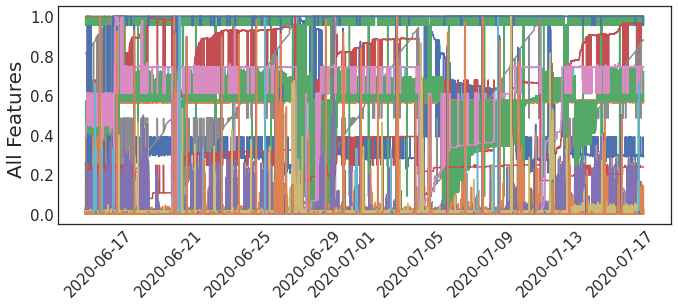

In [124]:
plt.plot(df_scaled_min_max_22.index, df_scaled_min_max_22)  #df_feat.columns.values)
plt.ylabel(('All Features '), fontsize=20);#$e^{7}$
plt.tick_params(labelsize=15)
plt.xticks(rotation=45)

plt.legend(loc="best", fontsize =14)

plt.legend(loc="best", fontsize =14)
plt.ticklabel_format(axis = 'y', style = 'sci', scilimits = (1,6))
plt.show()

In [125]:
# df_scaled_min_max_22.to_csv('/home/ubuntu/Zabbix/Data/SRV_Data/SRV_CORR_ANALYSIS/FEATURES/SRV_FR_SQLN_03_BFC_Feat_MinMax_Scaled_22.csv')

In [126]:
features_list

['Free memory',
 'SQL Server, Memory Manager: Target Server Memory',
 'Free disk space on E:',
 'SQL Server working set',
 'Incoming network traffic on Amazon Elastic Network Adapter',
 'Free disk space on I:',
 'SQL Server, Memory Manager: Memory Grants Outstanding',
 'SQL Server pf',
 'Incoming network traffic on Amazon Elastic Network Adapter-WFP 802.3 MAC Layer LightWeight Filter-0000',
 'SQL Server, Memory Manager: Total Server Memory',
 'SQL Server, Buffer Manager: Target pages',
 'SQL Server, Access Methods: Index Searches/sec',
 'SQL Server, Buffer Manager: Database pages',
 'SQL Server, Cache: Cache Pages',
 'Incoming network traffic on Amazon Elastic Network Adapter-WFP Native MAC Layer LightWeight Filter-0000',
 'Processor load (15 min average)',
 'SQL Server vmsize',
 'Outgoing network traffic on Amazon Elastic Network Adapter-WFP 802.3 MAC Layer LightWeight Filter-0000',
 'Processor load (5 min average)',
 'SQL Server, Access Methods: Page Splits/sec',
 'Outgoing network t

## Scaling full data set 
- df

### Standard Scaler

In [134]:
std_scaler = StandardScaler()

In [135]:
df_std_scaled_values = std_scaler.fit_transform(df.values)

In [136]:
df_std_scaled_values.shape

(45553, 83)

In [140]:
df.shape

(45553, 83)

In [139]:
list(df.columns)

['SQL Server, Errors: Errors/sec (DB Offline Errors)',
 'SQL Server working set',
 'Incoming network traffic on Amazon Elastic Network Adapter',
 'SQL Server, Access Methods: Forwarded Records per second',
 'SQL Server, Buffer Manager: Lazy writes/sec',
 'SQL Server, Buffer Manager: Read-ahead pages/sec',
 'SQL Server, Cache: Cache Object Counts',
 'SQL Server, Cache: Cache Hit Ratio',
 'SQL Server, Cache: Cache Objects in use',
 'SQL Server, Locks: Lock Wait Time (Total)',
 'SQL Server, Memory Manager: Memory Grants Pending',
 'SQL Server, Locks: Average Wait Time (Total)',
 'SQL Server, Access Methods: Page Splits/sec',
 'SQL Server, Buffer Manager: Target pages',
 'SQL Server: % Processor Time',
 'SQL Server, Locks: Lock Timeouts/sec (Total)',
 'Incoming network traffic on AWS PV Network Device #2',
 'Total disk space on D:',
 'Total disk space on H:',
 'SQL Server, Buffer Manager: Database pages',
 'Incoming network traffic on Amazon Elastic Network Adapter-WFP Native MAC Layer Lig

In [141]:
df_std_scaled_83 = pd.DataFrame(data = df_std_scaled_values, columns = list(df.columns), index = df.index)

In [143]:
df_std_scaled_83.head(2)

,"SQL Server, Errors: Errors/sec (DB Offline Errors)",SQL Server working set,Incoming network traffic on Amazon Elastic Network Adapter,"SQL Server, Access Methods: Forwarded Records per second","SQL Server, Buffer Manager: Lazy writes/sec","SQL Server, Buffer Manager: Read-ahead pages/sec","SQL Server, Cache: Cache Object Counts","SQL Server, Cache: Cache Hit Ratio","SQL Server, Cache: Cache Objects in use","SQL Server, Locks: Lock Wait Time (Total)",...,"SQL Server, Errors: Errors/sec (Kill Connection Errors)","SQL Server, Memory Manager: Total Server Memory","SQL Server, Access Methods: Full Scans/sec",Processor load (15 min average),"SQL Server, Locks: Lock Requests/sec (Total)","SQL Server, Latches: Average Latch Wait Time","SQL Server, Statistics: Failed Auto-Params/sec","SQL Server, Buffer Manager: % Buffer cache hit ratio","SQL Server, Memory Manager: Maximum Workspace Memory","SQL Server, Access Methods: Work files created/sec"
Date_Time,,,,,,,,,,,,,,,,,,,,,
2020-06-16 05:17:00,0.0,-0.774851,-0.249347,0.0,-0.006789,-0.049318,-1.193094,0.260534,-0.861726,-0.00484,...,0.0,-0.970465,-0.081545,4.300597,-0.142732,-0.011236,-0.004764,0.028568,-3.958697,-0.045448
2020-06-16 05:18:00,0.0,-0.774851,-0.248177,0.0,-0.006789,-0.049318,-1.193094,0.260534,-0.861726,-0.00484,...,0.0,-0.970462,-0.081545,4.230429,-0.142821,-0.011236,-0.004764,0.028568,-3.958697,-0.045448


In [199]:
# df_std_scaled_83[['SQL Server, Buffer Manager: % Buffer cache hit ratio']] #min(df_std_scaled_83.index)

In [144]:
df.head(2)

,"SQL Server, Errors: Errors/sec (DB Offline Errors)",SQL Server working set,Incoming network traffic on Amazon Elastic Network Adapter,"SQL Server, Access Methods: Forwarded Records per second","SQL Server, Buffer Manager: Lazy writes/sec","SQL Server, Buffer Manager: Read-ahead pages/sec","SQL Server, Cache: Cache Object Counts","SQL Server, Cache: Cache Hit Ratio","SQL Server, Cache: Cache Objects in use","SQL Server, Locks: Lock Wait Time (Total)",...,"SQL Server, Errors: Errors/sec (Kill Connection Errors)","SQL Server, Memory Manager: Total Server Memory","SQL Server, Access Methods: Full Scans/sec",Processor load (15 min average),"SQL Server, Locks: Lock Requests/sec (Total)","SQL Server, Latches: Average Latch Wait Time","SQL Server, Statistics: Failed Auto-Params/sec","SQL Server, Buffer Manager: % Buffer cache hit ratio","SQL Server, Memory Manager: Maximum Workspace Memory","SQL Server, Access Methods: Work files created/sec"
Date_Time,,,,,,,,,,,,,,,,,,,,,
2020-06-16 05:17:00,0.0,135592000.0,30056.0,0.0,0.0,0.0,139.0,80.043,1.0,0.0,...,0.0,1.115221e+10,0.0,0.0592,58.0909,0.0,0.0,100.0,1.011683e+10,0.0
2020-06-16 05:18:00,0.0,135592000.0,46176.0,0.0,0.0,0.0,139.0,80.043,1.0,0.0,...,0.0,1.115223e+10,0.0,0.0583,53.1690,0.0,0.0,100.0,1.011683e+10,0.0


In [145]:
df.describe()

,"SQL Server, Errors: Errors/sec (DB Offline Errors)",SQL Server working set,Incoming network traffic on Amazon Elastic Network Adapter,"SQL Server, Access Methods: Forwarded Records per second","SQL Server, Buffer Manager: Lazy writes/sec","SQL Server, Buffer Manager: Read-ahead pages/sec","SQL Server, Cache: Cache Object Counts","SQL Server, Cache: Cache Hit Ratio","SQL Server, Cache: Cache Objects in use","SQL Server, Locks: Lock Wait Time (Total)",...,"SQL Server, Errors: Errors/sec (Kill Connection Errors)","SQL Server, Memory Manager: Total Server Memory","SQL Server, Access Methods: Full Scans/sec",Processor load (15 min average),"SQL Server, Locks: Lock Requests/sec (Total)","SQL Server, Latches: Average Latch Wait Time","SQL Server, Statistics: Failed Auto-Params/sec","SQL Server, Buffer Manager: % Buffer cache hit ratio","SQL Server, Memory Manager: Maximum Workspace Memory","SQL Server, Access Methods: Work files created/sec"
count,45553.0,4.555300e+04,4.555300e+04,45553.0,45553.000000,45553.000000,45553.000000,45553.000000,45553.000000,45553.000000,...,45553.0,4.555300e+04,45553.000000,45553.000000,4.555300e+04,45553.000000,45553.000000,45553.000000,4.555300e+04,45553.00000
mean,0.0,1.629300e+08,3.465244e+06,0.0,0.140732,3.546871,219.463929,78.128820,1.633951,0.000357,...,0.0,1.730568e+10,0.038050,0.004039,7.920103e+03,0.131904,0.000022,99.985393,1.558719e+10,0.04543
std,0.0,3.528206e+07,1.377690e+07,0.0,20.729058,71.919706,67.442145,7.347222,0.735684,0.073809,...,0.0,6.340817e+09,0.466616,0.012827,5.508303e+04,11.739394,0.004613,0.511295,1.381872e+09,0.99960
min,0.0,8.053600e+07,2.486400e+04,0.0,0.000000,0.000000,0.000000,45.193200,0.000000,0.000000,...,0.0,5.714575e+08,0.000000,0.000000,0.000000e+00,0.000000,0.000000,4.529600,8.818237e+09,0.00000
25%,0.0,1.390280e+08,3.156800e+04,0.0,0.000000,0.000000,191.000000,74.436100,1.000000,0.000000,...,0.0,1.296785e+10,0.000000,0.000600,5.415460e+01,0.000000,0.000000,100.000000,1.575936e+10,0.00000
50%,0.0,1.799560e+08,5.084000e+04,0.0,0.000000,0.000000,224.000000,80.503100,2.000000,0.000000,...,0.0,2.097151e+10,0.000000,0.001000,5.710510e+01,0.000000,0.000000,100.000000,1.575936e+10,0.00000
75%,0.0,1.912800e+08,5.979840e+05,0.0,0.000000,0.000000,243.000000,83.266600,2.000000,0.000000,...,0.0,2.097152e+10,0.000000,0.003300,1.811678e+02,0.000000,0.000000,100.000000,1.575936e+10,0.00000
max,0.0,2.019840e+08,3.674257e+08,0.0,4292.887600,4584.284700,2219.000000,88.845100,32.000000,15.753100,...,0.0,2.807380e+10,18.705900,0.225000,1.161860e+06,2431.000000,0.984600,100.000000,2.097881e+10,47.26540


In [146]:
df_std_scaled_83.describe()

,"SQL Server, Errors: Errors/sec (DB Offline Errors)",SQL Server working set,Incoming network traffic on Amazon Elastic Network Adapter,"SQL Server, Access Methods: Forwarded Records per second","SQL Server, Buffer Manager: Lazy writes/sec","SQL Server, Buffer Manager: Read-ahead pages/sec","SQL Server, Cache: Cache Object Counts","SQL Server, Cache: Cache Hit Ratio","SQL Server, Cache: Cache Objects in use","SQL Server, Locks: Lock Wait Time (Total)",...,"SQL Server, Errors: Errors/sec (Kill Connection Errors)","SQL Server, Memory Manager: Total Server Memory","SQL Server, Access Methods: Full Scans/sec",Processor load (15 min average),"SQL Server, Locks: Lock Requests/sec (Total)","SQL Server, Latches: Average Latch Wait Time","SQL Server, Statistics: Failed Auto-Params/sec","SQL Server, Buffer Manager: % Buffer cache hit ratio","SQL Server, Memory Manager: Maximum Workspace Memory","SQL Server, Access Methods: Work files created/sec"
count,45553.0,4.555300e+04,4.555300e+04,45553.0,4.555300e+04,4.555300e+04,4.555300e+04,4.555300e+04,4.555300e+04,4.555300e+04,...,45553.0,4.555300e+04,4.555300e+04,4.555300e+04,4.555300e+04,4.555300e+04,4.555300e+04,4.555300e+04,4.555300e+04,4.555300e+04
mean,0.0,6.688489e-16,-2.495705e-18,0.0,5.459354e-19,-1.091871e-17,-1.846822e-16,1.038213e-15,3.993128e-17,-8.578985e-19,...,0.0,1.996564e-17,1.871779e-17,2.994846e-17,-1.497423e-17,6.239262e-18,1.871779e-18,-1.085694e-14,1.929180e-15,-9.046930e-18
std,0.0,1.000011e+00,1.000011e+00,0.0,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,...,0.0,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,0.0,-2.335321e+00,-2.497238e-01,0.0,-6.789208e-03,-4.931763e-02,-3.254142e+00,-4.482780e+00,-2.221020e+00,-4.840210e-03,...,0.0,-2.639157e+00,-8.154489e-02,-3.148793e-01,-1.437864e-01,-1.123614e-02,-4.764468e-03,-1.866962e+02,-4.898444e+00,-4.544849e-02
25%,0.0,-6.774632e-01,-2.492371e-01,0.0,-6.789208e-03,-4.931763e-02,-4.220542e-01,-5.026064e-01,-8.617260e-01,-4.840210e-03,...,0.0,-6.841210e-01,-8.154489e-02,-2.681008e-01,-1.428032e-01,-1.123614e-02,-4.764468e-03,2.856820e-02,1.245964e-01,-4.544849e-02
50%,0.0,4.825725e-01,-2.478383e-01,0.0,-6.789208e-03,-4.931763e-02,6.725944e-02,3.231569e-01,4.975675e-01,-4.840210e-03,...,0.0,5.781380e-01,-8.154489e-02,-2.369152e-01,-1.427497e-01,-1.123614e-02,-4.764468e-03,2.856820e-02,1.245964e-01,-4.544849e-02
75%,0.0,8.035324e-01,-2.081232e-01,0.0,-6.789208e-03,-4.931763e-02,3.489855e-01,6.992896e-01,4.975675e-01,-4.840210e-03,...,0.0,5.781393e-01,-8.154489e-02,-5.759770e-02,-1.404974e-01,-1.123614e-02,-4.764468e-03,2.856820e-02,1.245964e-01,-4.544849e-02
max,0.0,1.106919e+00,2.641847e+01,0.0,2.070906e+02,6.369309e+01,2.964849e+01,1.458565e+00,4.127637e+01,2.134291e+02,...,0.0,1.698240e+00,4.000728e+01,1.722705e+01,2.094933e+01,2.070716e+02,2.134291e+02,2.856820e-02,3.901725e+00,4.723938e+01


In [147]:
# df_std_scaled_83.to_csv('/home/ubuntu/Zabbix/Data/SRV_Data/SRV_CORR_ANALYSIS/FEATURES/SRV_FR_SQLN_03_BFC_STD_SCALED_83.csv')

### MinMax Scaling for all 83 features

In [150]:
min_max_scaler = MinMaxScaler()

In [151]:
df_min_max_scaled_values = min_max_scaler.fit_transform(df.values)

In [152]:
df_min_max_scaled_83 = pd.DataFrame(data = df_min_max_scaled_values, columns = list(df.columns), index = df.index)

In [153]:
df_min_max_scaled_83.shape

(45553, 83)

In [154]:
df_min_max_scaled_83.describe()

,"SQL Server, Errors: Errors/sec (DB Offline Errors)",SQL Server working set,Incoming network traffic on Amazon Elastic Network Adapter,"SQL Server, Access Methods: Forwarded Records per second","SQL Server, Buffer Manager: Lazy writes/sec","SQL Server, Buffer Manager: Read-ahead pages/sec","SQL Server, Cache: Cache Object Counts","SQL Server, Cache: Cache Hit Ratio","SQL Server, Cache: Cache Objects in use","SQL Server, Locks: Lock Wait Time (Total)",...,"SQL Server, Errors: Errors/sec (Kill Connection Errors)","SQL Server, Memory Manager: Total Server Memory","SQL Server, Access Methods: Full Scans/sec",Processor load (15 min average),"SQL Server, Locks: Lock Requests/sec (Total)","SQL Server, Latches: Average Latch Wait Time","SQL Server, Statistics: Failed Auto-Params/sec","SQL Server, Buffer Manager: % Buffer cache hit ratio","SQL Server, Memory Manager: Maximum Workspace Memory","SQL Server, Access Methods: Work files created/sec"
count,45553.0,45553.000000,45553.000000,45553.0,45553.000000,45553.000000,45553.000000,45553.000000,45553.000000,45553.000000,...,45553.0,45553.000000,45553.000000,45553.000000,45553.000000,45553.000000,45553.000000,45553.000000,45553.000000,45553.000000
mean,0.0,0.678431,0.009364,0.0,0.000033,0.000774,0.098902,0.754506,0.051061,0.000023,...,0.0,0.608466,0.002034,0.017950,0.006817,0.000054,0.000022,0.999847,0.556631,0.000961
std,0.0,0.290512,0.037498,0.0,0.004829,0.015688,0.030393,0.168314,0.022990,0.004685,...,0.0,0.230556,0.024945,0.057007,0.047409,0.004829,0.004685,0.005356,0.113635,0.021149
min,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.481622,0.000018,0.0,0.000000,0.000000,0.086075,0.669911,0.031250,0.000000,...,0.0,0.450739,0.000000,0.002667,0.000047,0.000000,0.000000,1.000000,0.570789,0.000000
50%,0.0,0.818622,0.000071,0.0,0.000000,0.000000,0.100946,0.808897,0.062500,0.000000,...,0.0,0.741757,0.000000,0.004444,0.000049,0.000000,0.000000,1.000000,0.570789,0.000000
75%,0.0,0.911864,0.001560,0.0,0.000000,0.000000,0.109509,0.872205,0.062500,0.000000,...,0.0,0.741757,0.000000,0.014667,0.000156,0.000000,0.000000,1.000000,0.570789,0.000000
max,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [155]:
# df_min_max_scaled_83.to_csv('/home/ubuntu/Zabbix/Data/SRV_Data/SRV_CORR_ANALYSIS/FEATURES/SRV_FR_SQLN_03_BFC_MIN_MAX_SCALED_83.csv')

In [163]:
df_min_max_scaled_83.index.name

'Date_Time'

In [173]:
# df.to_csv('/home/ubuntu/Zabbix/Data/SRV_Data/SRV_CORR_ANALYSIS/FEATURES/SRV_FR_SQLN_03_BFC_ACTUAL_83.csv')

# Building queries

In [156]:
# Create SQL query to create table

In [168]:
# query = '''
# CREATE TABLE public.srv_fr_sqln_03bfc_22 (
# "'Date_Time'" timestamp NULL,

# '''

# for col in list(df.columns):

        
#     if col == 'Incoming network traffic on Amazon Elastic Network Adapter':
#         col = 'First_Incoming_network_traffic_on_Amazon_Elastic_Network_Adapt'
        
#     if col == 'Incoming network traffic on Amazon Elastic Network Adapter-WFP 802.3 MAC Layer LightWeight Filter-0000':
#         col = 'Second_Incoming_network_traffic_on_Amazon_Elastic_Network_Adap'
        
#     if col == 'Incoming network traffic on Amazon Elastic Network Adapter-WFP Native MAC Layer LightWeight Filter-0000':
#         col = 'Third_Incoming_network_traffic_on_Amazon_Elastic_Network_Adapt'
        
        
#     if col == 'Outgoing network traffic on Amazon Elastic Network Adapter-WFP 802.3 MAC Layer LightWeight Filter-0000':
#         col = 'Fourth_Outgoing_network_traffic_on_Amazon_Elastic_Network_Adap'
        
#     if col == 'Outgoing network traffic on Amazon Elastic Network Adapter-WFP Native MAC Layer LightWeight Filter-0000':
#         col = 'Five_Outgoing_network_traffic_on_Amazon_Elastic_Network_Adapte'
        
#     if col == 'Outgoing network traffic on Amazon Elastic Network Adapter':
#         col = 'Six_Outgoing_network_traffic_on_Amazon_Elastic_Network_Adapter'
        
#     col_query = '"' + "'" + col + "'" + '"' + ' varchar NULL,' + "\n"
#     query = query + col_query
        
    

In [170]:
# query + ");"

'\nCREATE TABLE public.srv_fr_sqln_03bfc_22 (\n"\'Date_Time\'" timestamp NULL,\n\n"\'SQL Server, Errors: Errors/sec (DB Offline Errors)\'" varchar NULL,\n"\'SQL Server working set\'" varchar NULL,\n"\'First_Incoming_network_traffic_on_Amazon_Elastic_Network_Adapt\'" varchar NULL,\n"\'SQL Server, Access Methods: Forwarded Records per second\'" varchar NULL,\n"\'SQL Server, Buffer Manager: Lazy writes/sec\'" varchar NULL,\n"\'SQL Server, Buffer Manager: Read-ahead pages/sec\'" varchar NULL,\n"\'SQL Server, Cache: Cache Object Counts\'" varchar NULL,\n"\'SQL Server, Cache: Cache Hit Ratio\'" varchar NULL,\n"\'SQL Server, Cache: Cache Objects in use\'" varchar NULL,\n"\'SQL Server, Locks: Lock Wait Time (Total)\'" varchar NULL,\n"\'SQL Server, Memory Manager: Memory Grants Pending\'" varchar NULL,\n"\'SQL Server, Locks: Average Wait Time (Total)\'" varchar NULL,\n"\'SQL Server, Access Methods: Page Splits/sec\'" varchar NULL,\n"\'SQL Server, Buffer Manager: Target pages\'" varchar NULL,\n"

In [182]:
## Grafana query

query = '''
SELECT 

"'Date_Time'" AS "time",

'''

for col in list(df.columns):

        
    if col == 'Incoming network traffic on Amazon Elastic Network Adapter':
        col = 'First_Incoming_network_traffic_on_Amazon_Elastic_Network_Adapt'
        
    if col == 'Incoming network traffic on Amazon Elastic Network Adapter-WFP 802.3 MAC Layer LightWeight Filter-0000':
        col = 'Second_Incoming_network_traffic_on_Amazon_Elastic_Network_Adap'
        
    if col == 'Incoming network traffic on Amazon Elastic Network Adapter-WFP Native MAC Layer LightWeight Filter-0000':
        col = 'Third_Incoming_network_traffic_on_Amazon_Elastic_Network_Adapt'
        
        
    if col == 'Outgoing network traffic on Amazon Elastic Network Adapter-WFP 802.3 MAC Layer LightWeight Filter-0000':
        col = 'Fourth_Outgoing_network_traffic_on_Amazon_Elastic_Network_Adap'
        
    if col == 'Outgoing network traffic on Amazon Elastic Network Adapter-WFP Native MAC Layer LightWeight Filter-0000':
        col = 'Five_Outgoing_network_traffic_on_Amazon_Elastic_Network_Adapte'
        
    if col == 'Outgoing network traffic on Amazon Elastic Network Adapter':
        col = 'Six_Outgoing_network_traffic_on_Amazon_Elastic_Network_Adapter'
        
    col_query = "cast("  + '"' + "'" + col + "'" + '"' + ' as FLOAT) as ' + '"' + "'" + col + "'" + '"' + "," + "\n"
    query = query + col_query
        
    

In [183]:
print(query)


SELECT 

"'Date_Time'" AS "time",

cast("'SQL Server, Errors: Errors/sec (DB Offline Errors)'" as FLOAT) as "'SQL Server, Errors: Errors/sec (DB Offline Errors)'",
cast("'SQL Server working set'" as FLOAT) as "'SQL Server working set'",
cast("'First_Incoming_network_traffic_on_Amazon_Elastic_Network_Adapt'" as FLOAT) as "'First_Incoming_network_traffic_on_Amazon_Elastic_Network_Adapt'",
cast("'SQL Server, Access Methods: Forwarded Records per second'" as FLOAT) as "'SQL Server, Access Methods: Forwarded Records per second'",
cast("'SQL Server, Buffer Manager: Lazy writes/sec'" as FLOAT) as "'SQL Server, Buffer Manager: Lazy writes/sec'",
cast("'SQL Server, Buffer Manager: Read-ahead pages/sec'" as FLOAT) as "'SQL Server, Buffer Manager: Read-ahead pages/sec'",
cast("'SQL Server, Cache: Cache Object Counts'" as FLOAT) as "'SQL Server, Cache: Cache Object Counts'",
cast("'SQL Server, Cache: Cache Hit Ratio'" as FLOAT) as "'SQL Server, Cache: Cache Hit Ratio'",
cast("'SQL Server, Cache: 

# -------------------- 
# Continuation 

No handles with labels found to put in legend.
No handles with labels found to put in legend.


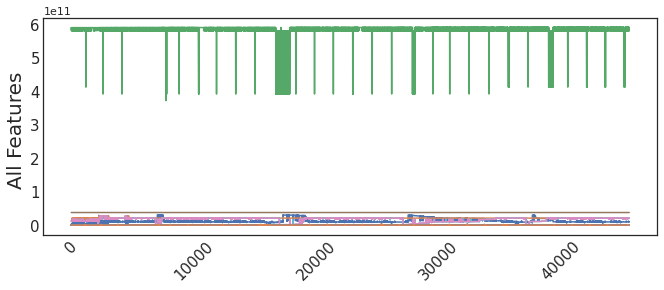

In [31]:
# df_feat['SQL Server, Memory Manager: Target Server Memory'].plot.line( figsize = (50,40),linewidth=2.5, fontsize=20)

# plt.ylabel(('All Features '), fontsize=20);#$e^{7}$
# plt.xlabel('Date', fontsize=20);
# plt.tick_params(labelsize=15)
# plt.xticks(df_feat.index, fontsize = 15)
# plt.legend(loc="best", fontsize =14)
# plt.ticklabel_format(axis = 'y', style = 'sci', scilimits = (1,6))
#plt.savefig('ALL_Features.png')
# plt.show()


plt.plot(df_feat.index, df_feat)  #df_feat.columns.values)
plt.ylabel(('All Features '), fontsize=20);#$e^{7}$
plt.tick_params(labelsize=15)
plt.xticks(rotation=45)

plt.legend(loc="best", fontsize =14)

plt.legend(loc="best", fontsize =14)
plt.ticklabel_format(axis = 'y', style = 'sci', scilimits = (1,6))
plt.show()



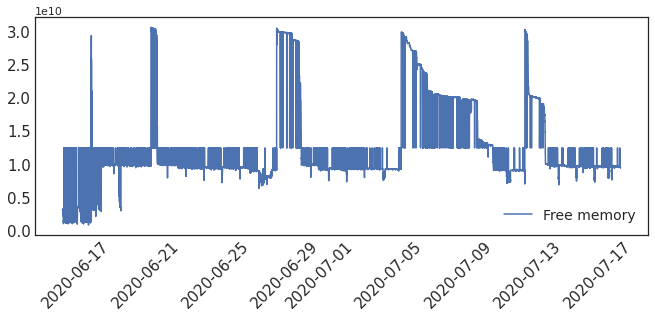

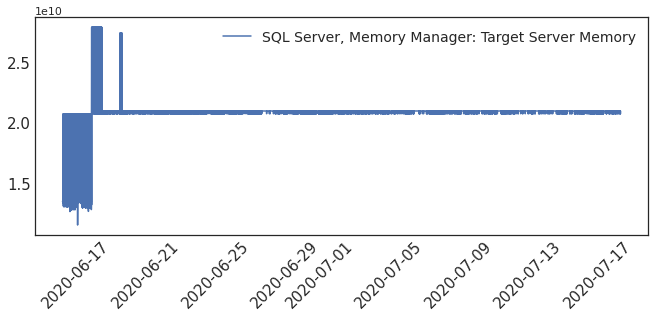

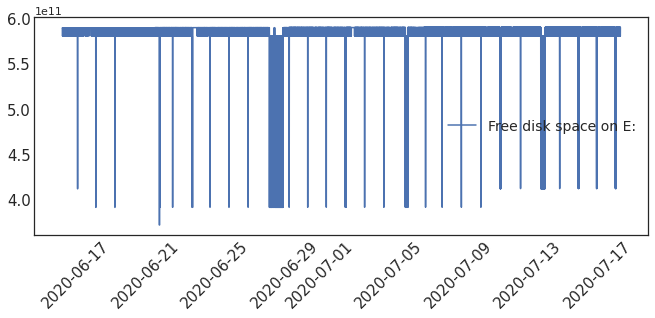

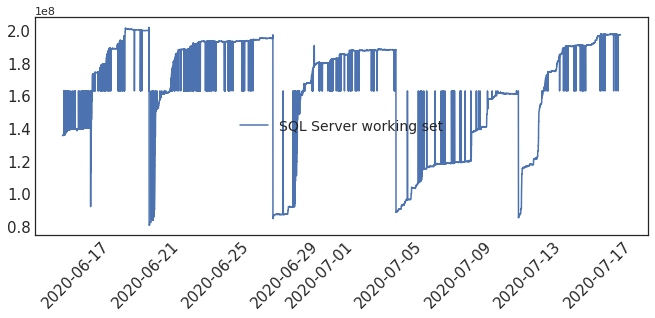

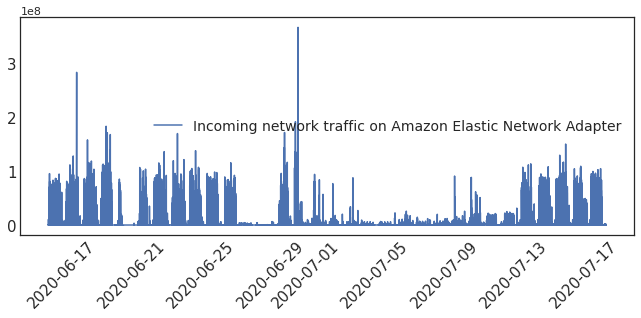

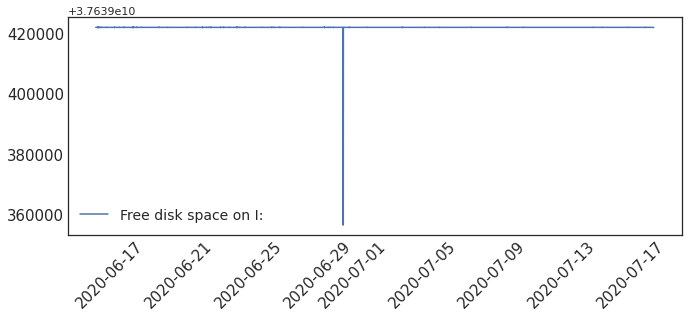

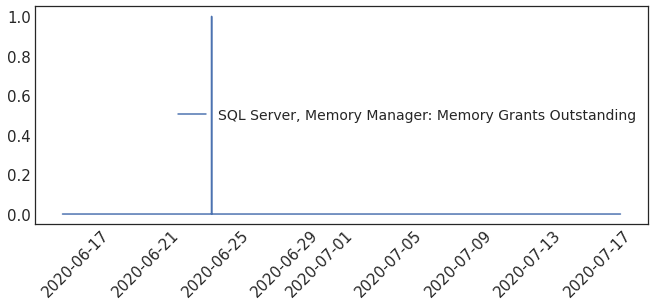

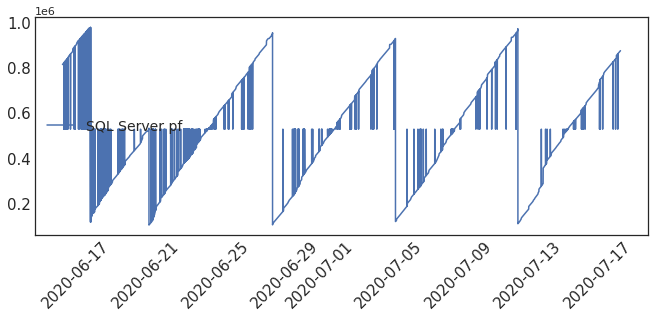

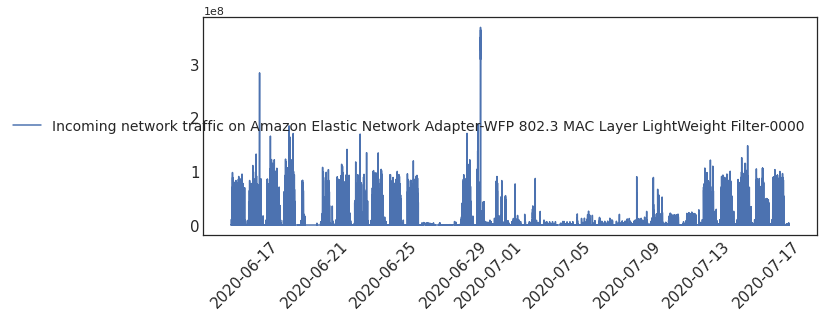

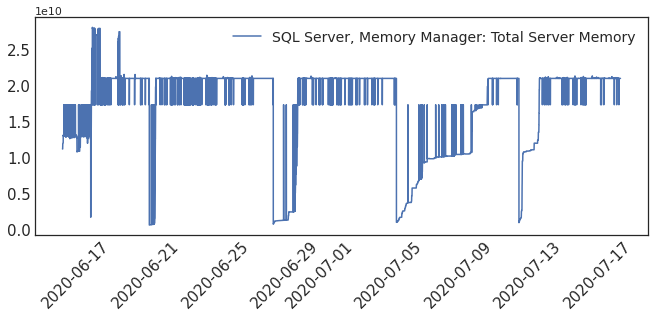

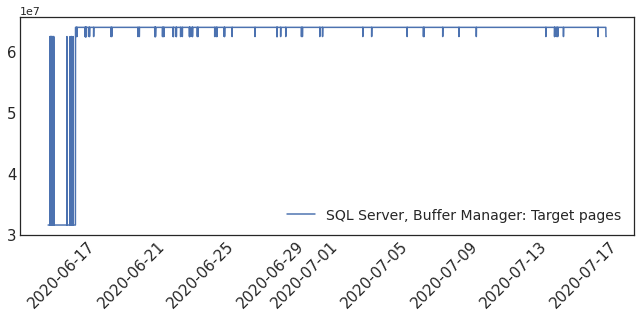

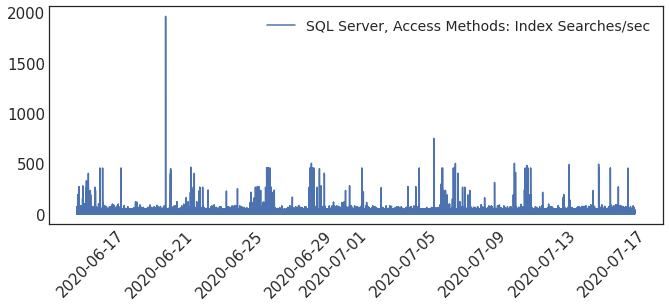

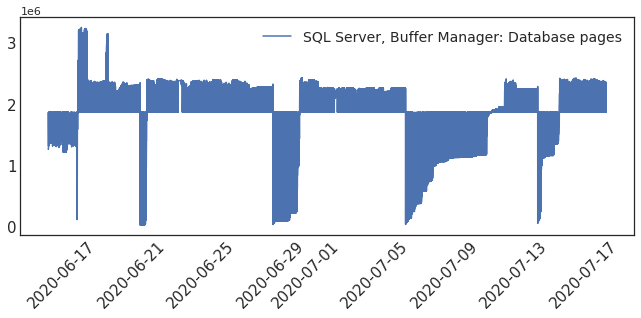

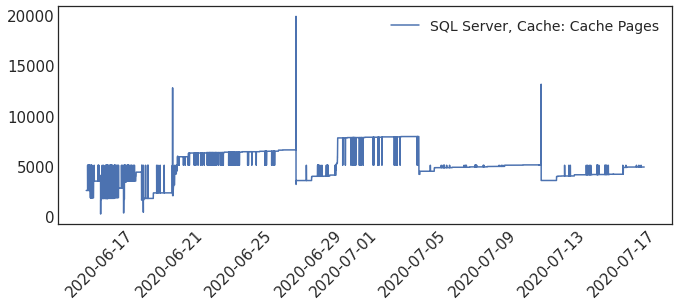

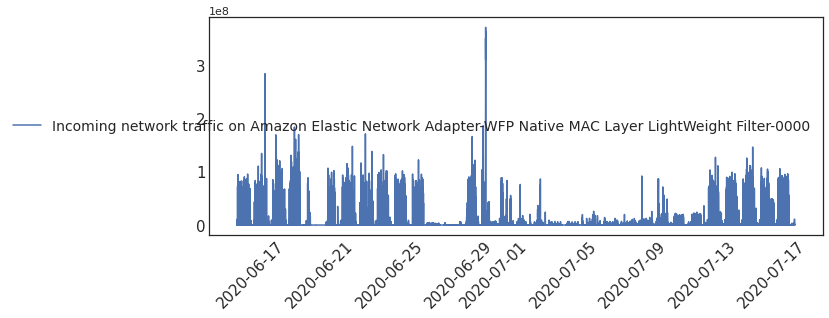

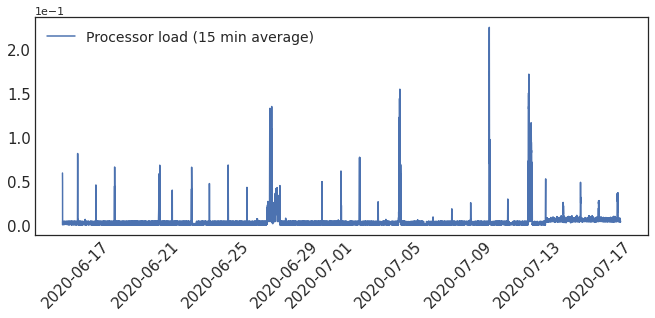

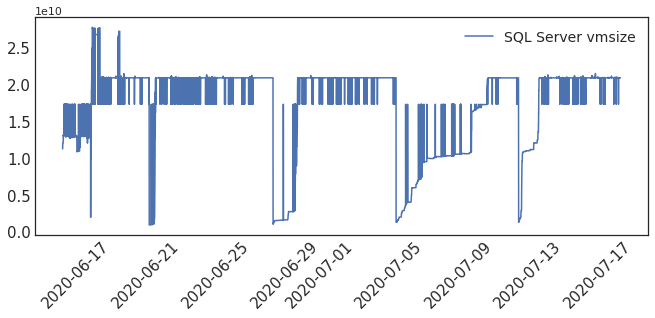

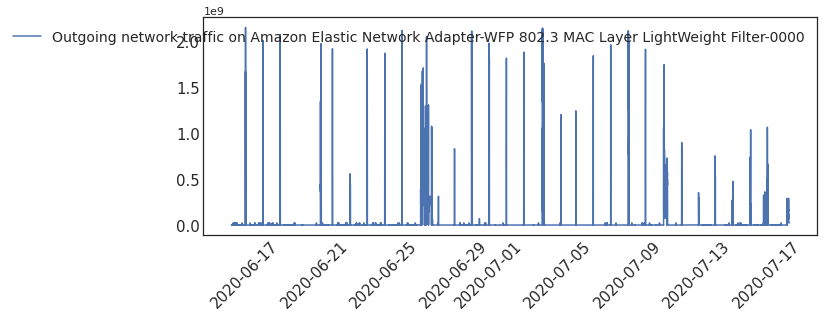

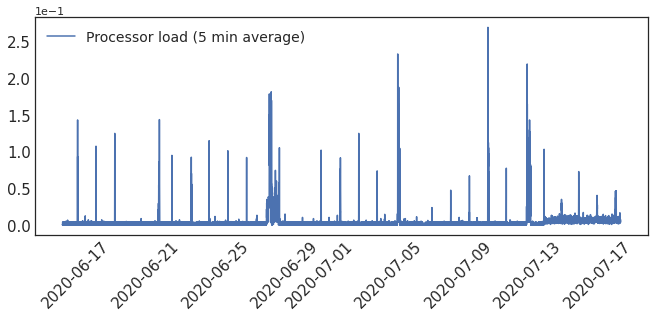

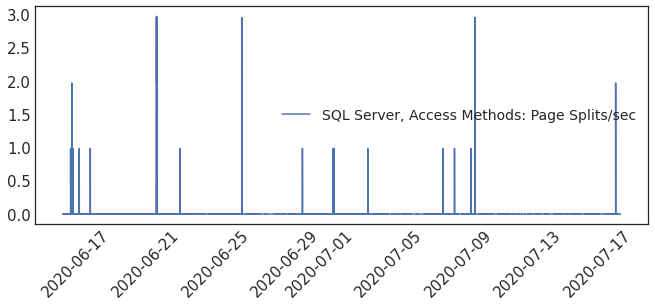

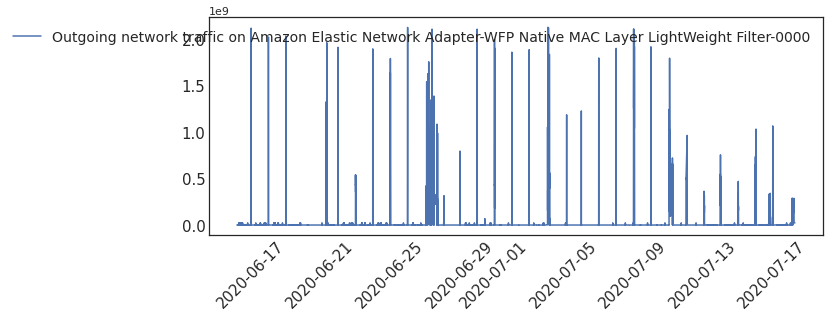

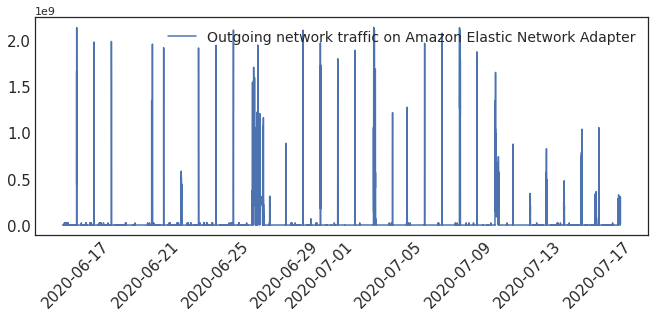

In [137]:
# One by one plot

for col in features_list:
    plt.plot(df_feat.index, df_feat[col], label = col)  #df_feat.columns.values)
    #plt.ylabel(col, fontsize=20);#$e^{7}$
    
    plt.tick_params(labelsize=15)
    plt.xticks(rotation=45)

    plt.legend(loc="best", fontsize =14)

    plt.legend(loc="best", fontsize =14)
    plt.ticklabel_format(axis = 'y', style = 'sci', scilimits = (1,6))
    plt.show()


In [162]:
len(features_list)

22

## Plot of Selected features

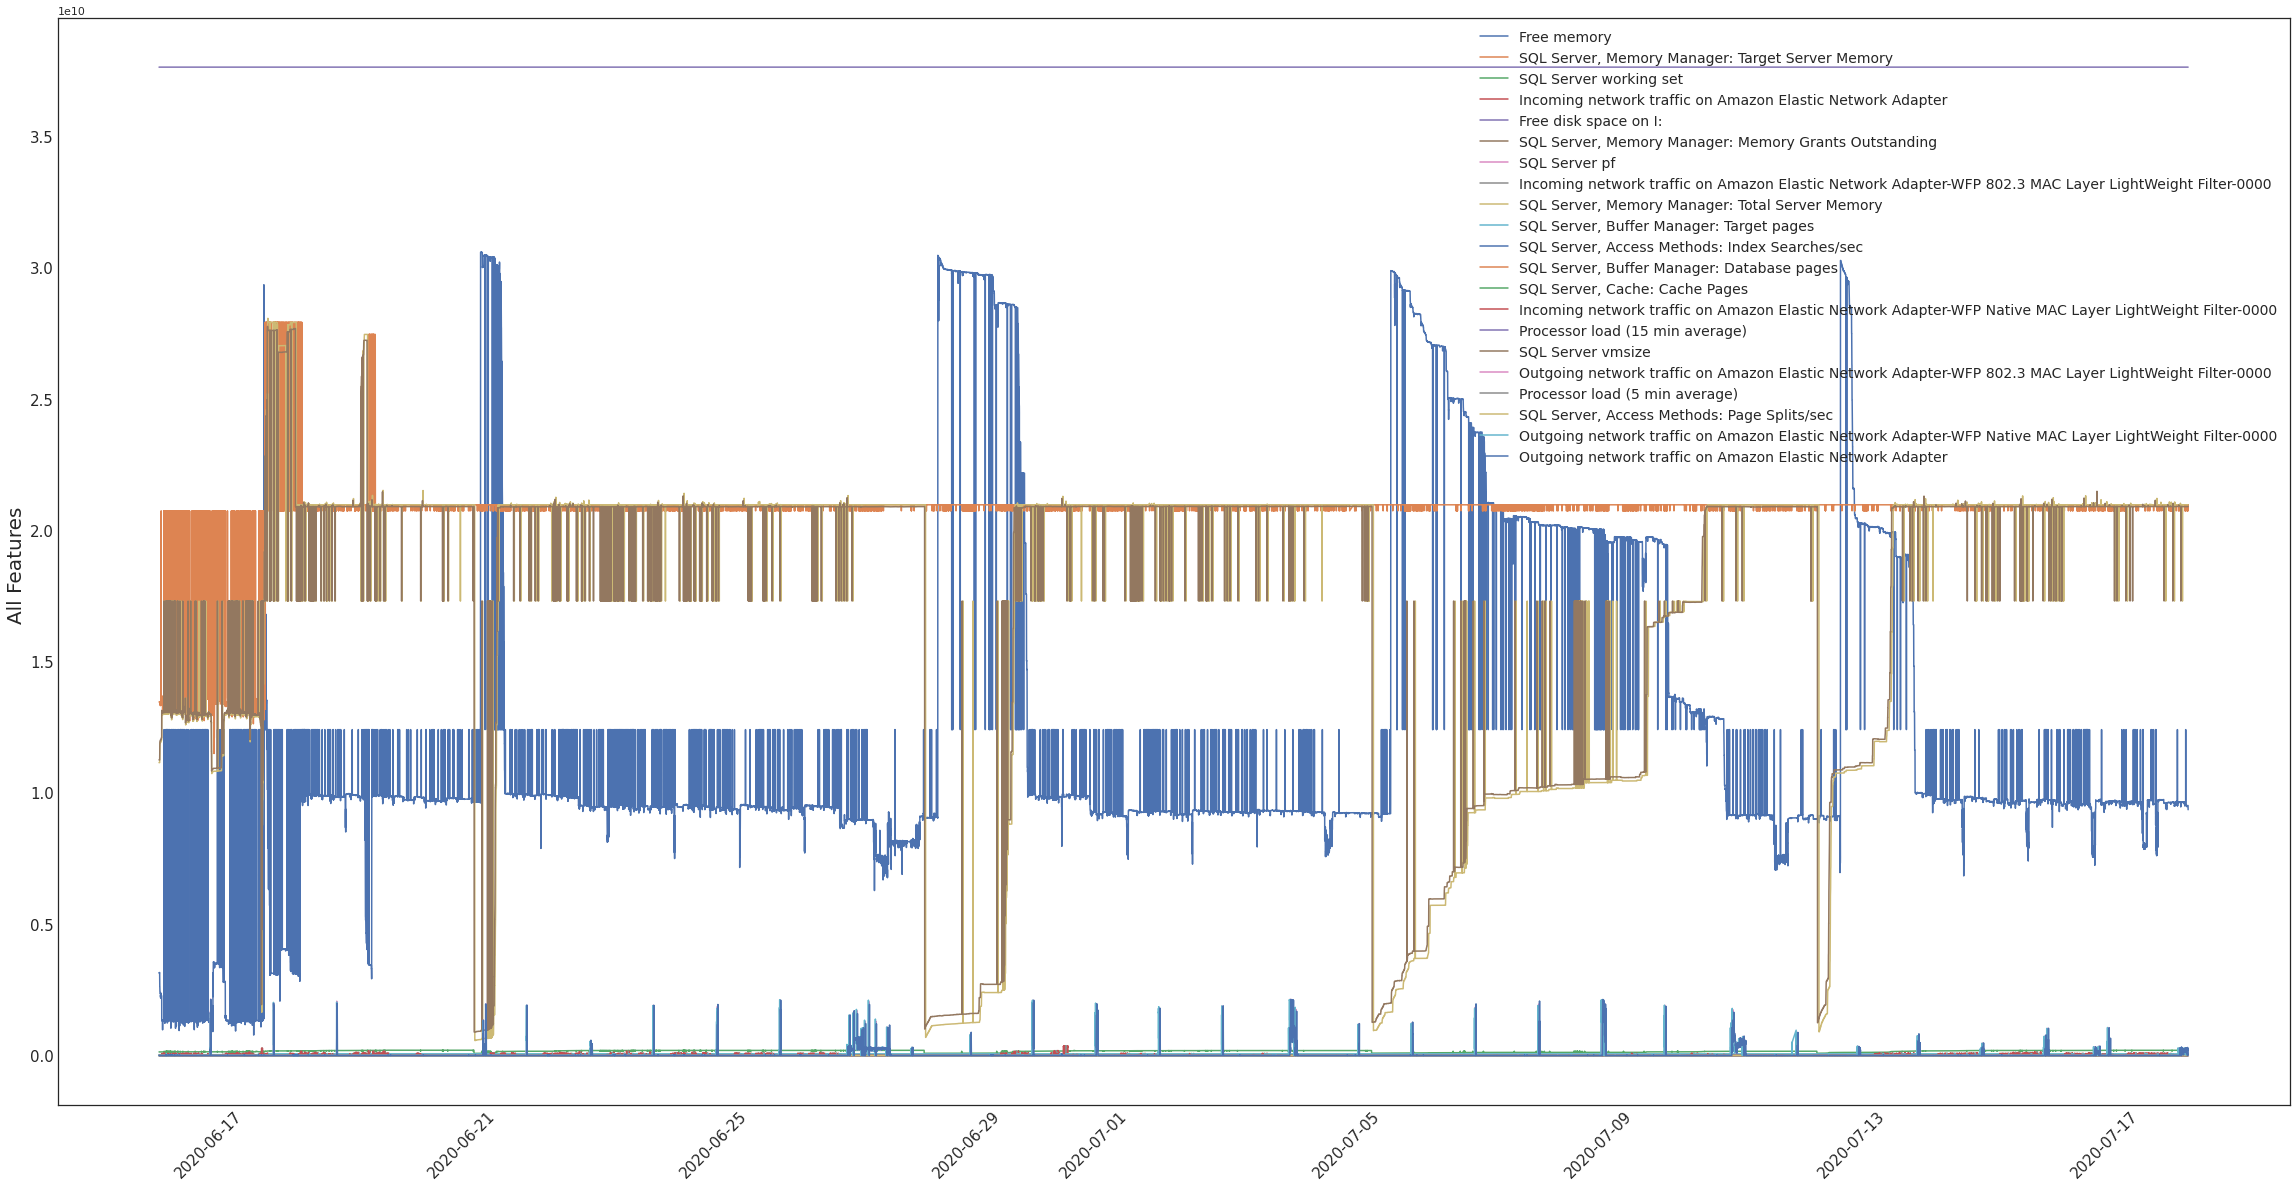

In [161]:

plt.figure(figsize = (40,20))#,linewidth=2.5, fontsize=20)

plt.plot(df_feat.index, df_feat['Free memory'], label = 'Free memory')  #df_feat.columns.values
plt.plot(df_feat.index, df_feat['SQL Server, Memory Manager: Target Server Memory'], label = 'SQL Server, Memory Manager: Target Server Memory')
# plt.plot(df_feat.index, df_feat['Free disk space on E:'], label = 'Free disk space on E:')
plt.plot(df_feat.index, df_feat['SQL Server working set'], label = 'SQL Server working set')
plt.plot(df_feat.index, df_feat['Incoming network traffic on Amazon Elastic Network Adapter'], label = 'Incoming network traffic on Amazon Elastic Network Adapter')
plt.plot(df_feat.index, df_feat['Free disk space on I:'], label = 'Free disk space on I:')
plt.plot(df_feat.index, df_feat['SQL Server, Memory Manager: Memory Grants Outstanding'], label = 'SQL Server, Memory Manager: Memory Grants Outstanding')
plt.plot(df_feat.index, df_feat['SQL Server pf'], label = 'SQL Server pf')
plt.plot(df_feat.index, df_feat['Incoming network traffic on Amazon Elastic Network Adapter-WFP 802.3 MAC Layer LightWeight Filter-0000'], label = 'Incoming network traffic on Amazon Elastic Network Adapter-WFP 802.3 MAC Layer LightWeight Filter-0000')
plt.plot(df_feat.index, df_feat['SQL Server, Memory Manager: Total Server Memory'], label = 'SQL Server, Memory Manager: Total Server Memory')
plt.plot(df_feat.index, df_feat['SQL Server, Buffer Manager: Target pages'], label = 'SQL Server, Buffer Manager: Target pages')
plt.plot(df_feat.index, df_feat['SQL Server, Access Methods: Index Searches/sec'], label = 'SQL Server, Access Methods: Index Searches/sec')
plt.plot(df_feat.index, df_feat['SQL Server, Buffer Manager: Database pages'], label = 'SQL Server, Buffer Manager: Database pages')
plt.plot(df_feat.index, df_feat['SQL Server, Cache: Cache Pages'], label = 'SQL Server, Cache: Cache Pages')
plt.plot(df_feat.index, df_feat['Incoming network traffic on Amazon Elastic Network Adapter-WFP Native MAC Layer LightWeight Filter-0000'], label = 'Incoming network traffic on Amazon Elastic Network Adapter-WFP Native MAC Layer LightWeight Filter-0000')
plt.plot(df_feat.index, df_feat['Processor load (15 min average)'], label = 'Processor load (15 min average)')
plt.plot(df_feat.index, df_feat['SQL Server vmsize'], label = 'SQL Server vmsize')
plt.plot(df_feat.index, df_feat['Outgoing network traffic on Amazon Elastic Network Adapter-WFP 802.3 MAC Layer LightWeight Filter-0000'], label = 'Outgoing network traffic on Amazon Elastic Network Adapter-WFP 802.3 MAC Layer LightWeight Filter-0000')
plt.plot(df_feat.index, df_feat['Processor load (5 min average)'], label = 'Processor load (5 min average)')
plt.plot(df_feat.index, df_feat['SQL Server, Access Methods: Page Splits/sec'], label = 'SQL Server, Access Methods: Page Splits/sec')
plt.plot(df_feat.index, df_feat['Outgoing network traffic on Amazon Elastic Network Adapter-WFP Native MAC Layer LightWeight Filter-0000'], label = 'Outgoing network traffic on Amazon Elastic Network Adapter-WFP Native MAC Layer LightWeight Filter-0000')
plt.plot(df_feat.index, df_feat['Outgoing network traffic on Amazon Elastic Network Adapter'], label = 'Outgoing network traffic on Amazon Elastic Network Adapter' )



plt.plot(figsize = (100,80),linewidth=2.5, fontsize=20)
plt.ylabel(('All Features '), fontsize=20);#$e^{7}$
plt.tick_params(labelsize=15)
plt.xticks(rotation=45)

plt.legend(loc="best", fontsize =14)
plt.ticklabel_format(axis = 'y', style = 'sci', scilimits = (1,6))
plt.savefig('/home/ubuntu/Zabbix/Data/SRV_Data/SRV_CORR_ANALYSIS/FEATURES/SRV-FR-SQLN-03_BFC/Plots/ALL_Features_3.svg', format = 'svg', dpi = 300)
plt.show()


In [166]:
# df_feat.to_csv('/home/ubuntu/Zabbix/Data/SRV_Data/SRV_CORR_ANALYSIS/FEATURES/SRV_FR_SQLN_03_BFC_Feat22.csv')

# Exploration
- Hourly 

In [ ]:
# df.set_index('Date_Time', inplace = True)

In [220]:
# df.index
# df.index = pd.to_datetime(df.index)

In [241]:
# df.index

In [223]:

# Resampling in mean()
hourlydat = df.resample('H').mean()

In [224]:
hourlydat.head()

,"SQL Server, Errors: Errors/sec (DB Offline Errors)",SQL Server working set,Incoming network traffic on Amazon Elastic Network Adapter,"SQL Server, Access Methods: Forwarded Records per second","SQL Server, Buffer Manager: Lazy writes/sec","SQL Server, Buffer Manager: Read-ahead pages/sec","SQL Server, Cache: Cache Object Counts","SQL Server, Cache: Cache Hit Ratio","SQL Server, Cache: Cache Objects in use","SQL Server, Locks: Lock Wait Time (Total)",...,"SQL Server, Errors: Errors/sec (Kill Connection Errors)","SQL Server, Memory Manager: Total Server Memory","SQL Server, Access Methods: Full Scans/sec",Processor load (15 min average),"SQL Server, Locks: Lock Requests/sec (Total)","SQL Server, Latches: Average Latch Wait Time","SQL Server, Statistics: Failed Auto-Params/sec","SQL Server, Buffer Manager: % Buffer cache hit ratio","SQL Server, Memory Manager: Maximum Workspace Memory","SQL Server, Access Methods: Work files created/sec"
Date_Time,,,,,,,,,,,,,,,,,,,,,
2020-06-16 05:00:00,0.0,1.355635e+08,5.696990e+05,0.0,0.009819,0.045795,139.000000,79.457509,1.000000,0.000000,...,0.0,1.161651e+10,0.091593,0.010429,4056.505942,0.033542,0.000000e+00,99.999660,1.009354e+10,0.001057
2020-06-16 06:00:00,0.0,1.356766e+08,6.736866e+06,0.0,0.011728,1.312810,139.000000,80.865033,1.000000,0.000006,...,0.0,1.268393e+10,0.000634,0.001873,23386.610742,0.072613,0.000000e+00,99.999510,1.030263e+10,0.000757
2020-06-16 07:00:00,0.0,1.368659e+08,1.243258e+07,0.0,0.104298,12.430271,140.387309,77.639724,1.010930,0.000012,...,0.0,1.317892e+10,0.069216,0.001615,23074.876462,0.259457,7.579017e-07,99.991567,1.042108e+10,0.002350
2020-06-16 08:00:00,0.0,1.400513e+08,9.117368e+06,0.0,0.026183,67.794082,142.742508,79.085782,1.058972,0.000075,...,0.0,1.372411e+10,0.168248,0.002209,20439.842208,0.040210,4.600287e-06,99.982604,1.131415e+10,0.008452
2020-06-16 09:00:00,0.0,1.419014e+08,8.251185e+06,0.0,0.119027,3.474285,139.000000,80.233545,1.016255,0.000073,...,0.0,1.379138e+10,0.033054,0.002368,12863.908371,0.108046,3.944976e-06,99.996629,1.130716e+10,0.010484


In [225]:
print("Minimum Time in hourly data",hourlydat.index.min())
print("Maximum Time in hourly data", hourlydat.index.max())

Minimum Time in hourly data 2020-06-16 05:00:00
Maximum Time in hourly data 2020-07-18 07:00:00


In [226]:
# Columns with Buffer 
buffer_col = list(hourlydat.iloc[0:2,hourlydat.columns.str.contains('Buffer')].columns)

In [45]:
df.index

DatetimeIndex(['2020-06-16 05:17:00', '2020-06-16 05:18:00',
               '2020-06-16 05:19:00', '2020-06-16 05:20:00',
               '2020-06-16 05:21:00', '2020-06-16 05:22:00',
               '2020-06-16 05:23:00', '2020-06-16 05:24:00',
               '2020-06-16 05:25:00', '2020-06-16 05:26:00',
               ...
               '2020-07-18 07:35:00', '2020-07-18 07:36:00',
               '2020-07-18 07:37:00', '2020-07-18 07:38:00',
               '2020-07-18 07:39:00', '2020-07-18 07:40:00',
               '2020-07-18 07:41:00', '2020-07-18 07:42:00',
               '2020-07-18 07:43:00', '2020-07-18 07:44:00'],
              dtype='datetime64[ns]', name='Date_Time', length=45553, freq=None)

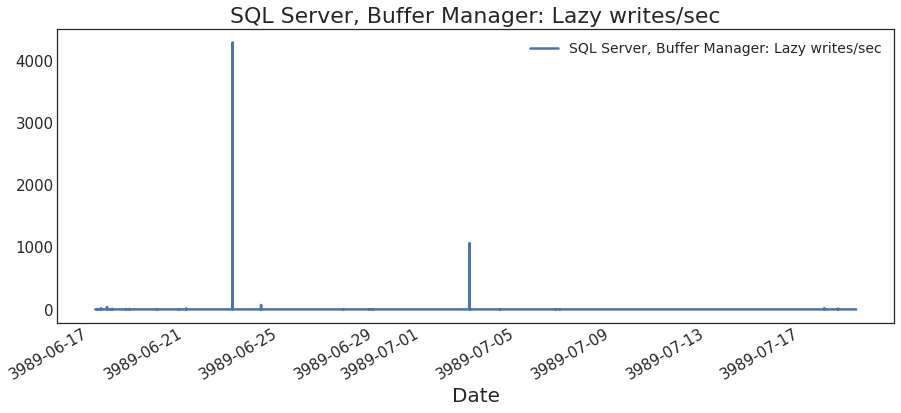

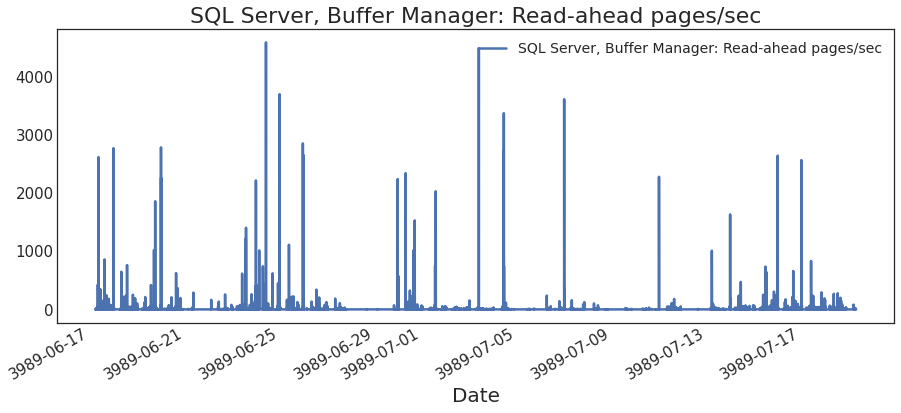

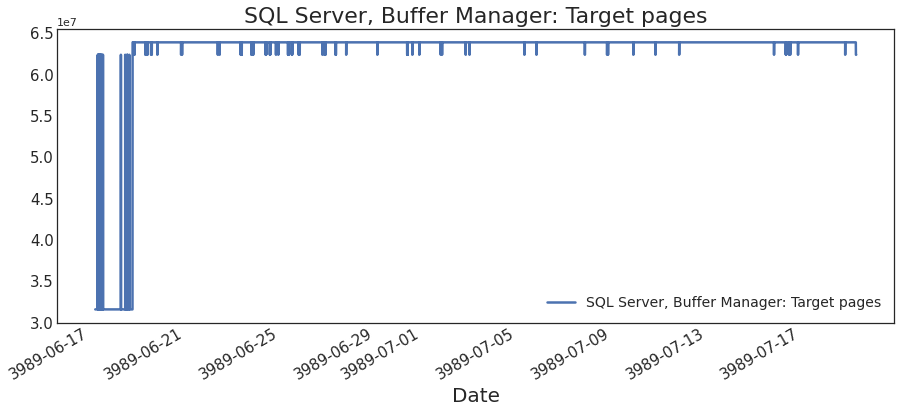

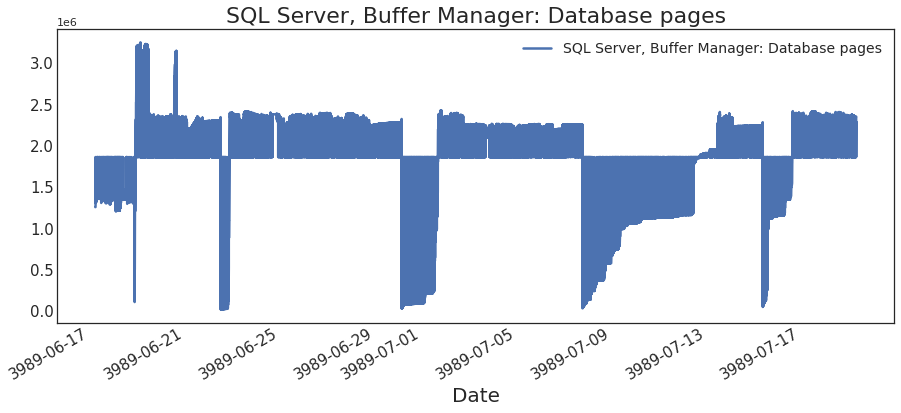

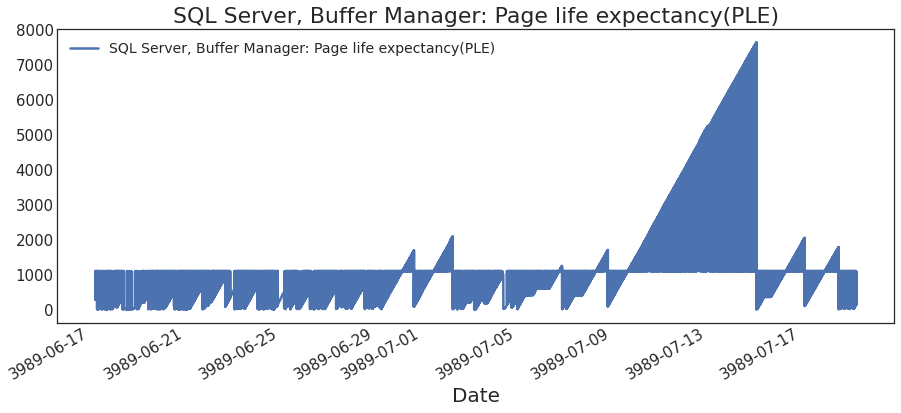

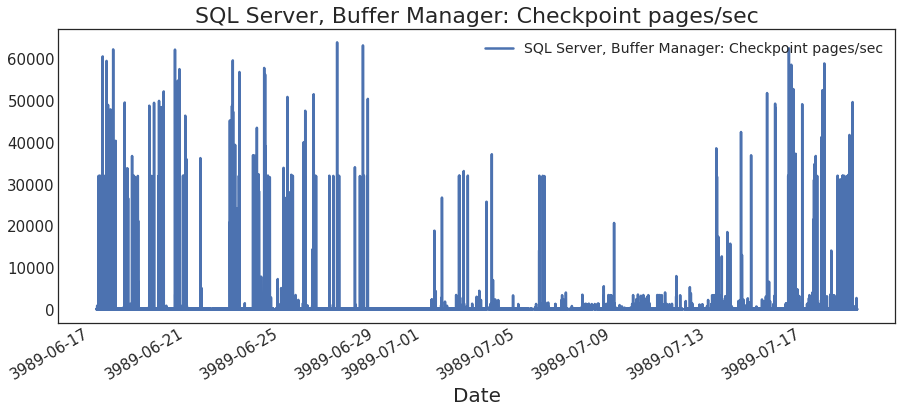

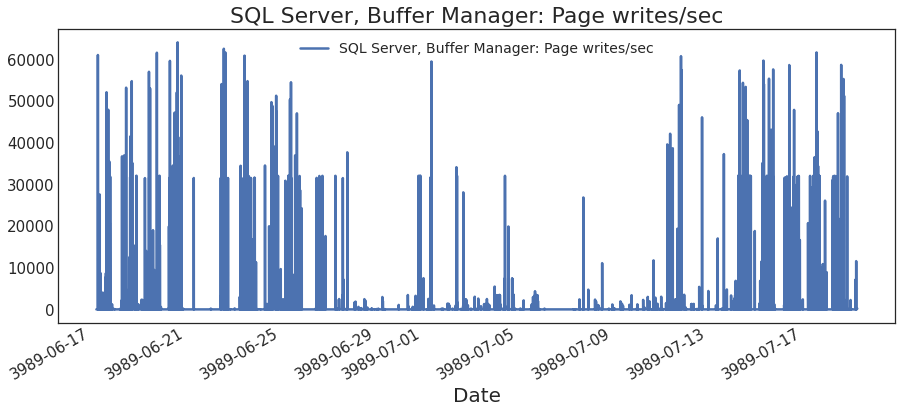

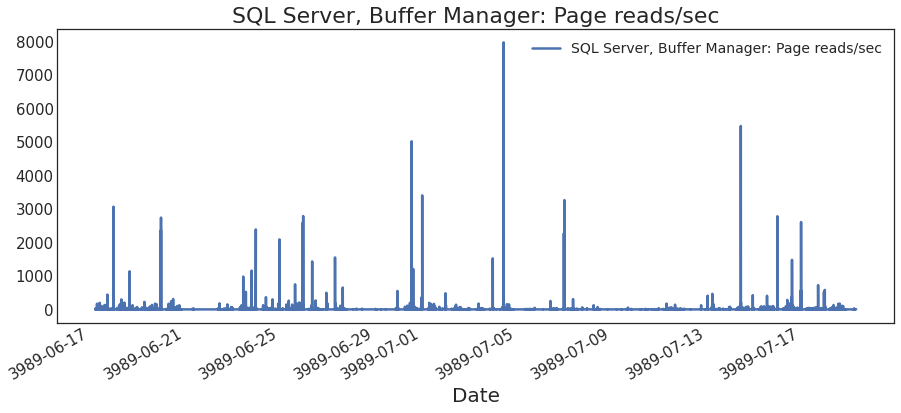

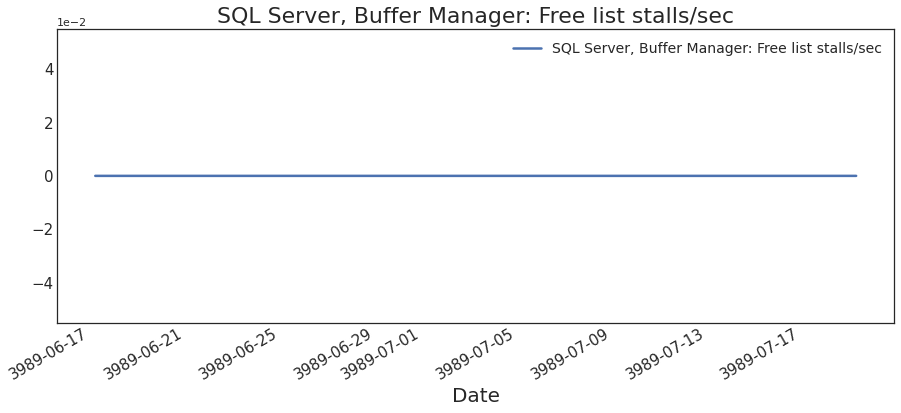

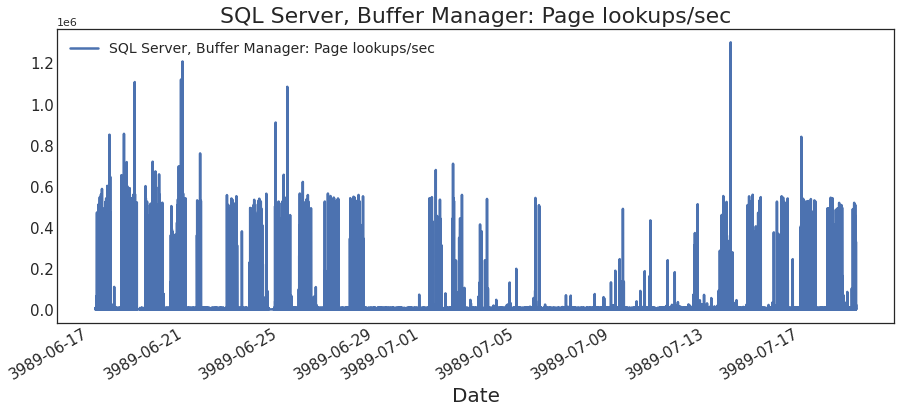

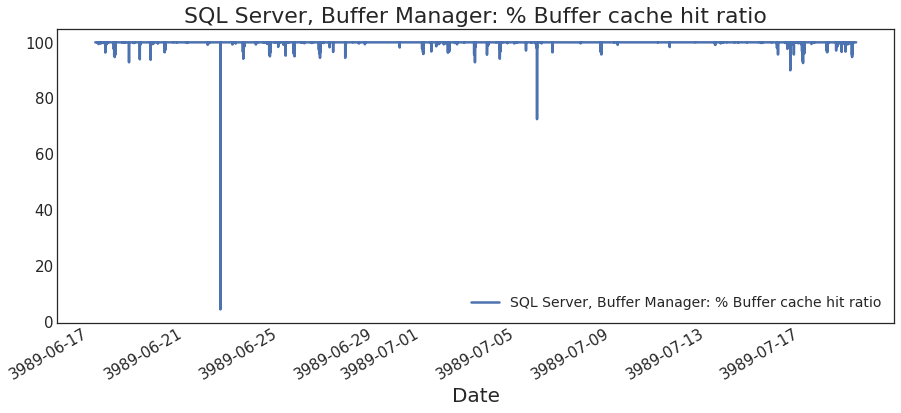

In [48]:
# # Plot Buffer Col

# for col in buffer_col:
       
#     df[col].plot(figsize = (15,6),linewidth=2.5, fontsize=20)
#     plt.title(col,fontsize=22)
#     #plt.ylabel((col), fontsize=20);#$e^{7}$
#     plt.xlabel('Date', fontsize=20);
#     plt.tick_params(labelsize=15)
#     plt.xticks( fontsize = 15)
#     plt.legend(loc="best", fontsize =14)
#     plt.ticklabel_format(axis = 'y', style = 'sci', scilimits = (1,6))
#     plt.show()

In [227]:
buffer_col

['SQL Server, Buffer Manager: Lazy writes/sec',
 'SQL Server, Buffer Manager: Read-ahead pages/sec',
 'SQL Server, Buffer Manager: Target pages',
 'SQL Server, Buffer Manager: Database pages',
 'SQL Server, Buffer Manager: Page life expectancy(PLE)',
 'SQL Server, Buffer Manager: Checkpoint pages/sec',
 'SQL Server, Buffer Manager: Page writes/sec',
 'SQL Server, Buffer Manager: Page reads/sec',
 'SQL Server, Buffer Manager: Free list stalls/sec',
 'SQL Server, Buffer Manager: Page lookups/sec',
 'SQL Server, Buffer Manager: % Buffer cache hit ratio']

In [286]:
# df_ts = df.copy()

In [287]:
df_ts.index

DatetimeIndex(['2020-06-16 05:17:00', '2020-06-16 05:18:00',
               '2020-06-16 05:19:00', '2020-06-16 05:20:00',
               '2020-06-16 05:21:00', '2020-06-16 05:22:00',
               '2020-06-16 05:23:00', '2020-06-16 05:24:00',
               '2020-06-16 05:25:00', '2020-06-16 05:26:00',
               ...
               '2020-07-18 07:35:00', '2020-07-18 07:36:00',
               '2020-07-18 07:37:00', '2020-07-18 07:38:00',
               '2020-07-18 07:39:00', '2020-07-18 07:40:00',
               '2020-07-18 07:41:00', '2020-07-18 07:42:00',
               '2020-07-18 07:43:00', '2020-07-18 07:44:00'],
              dtype='datetime64[ns]', name='Date_Time', length=45553, freq=None)

In [288]:
df_ts = df_ts.resample('60S').mean().bfill()#.index#.freq#('T')

In [300]:
df_ts.index

DatetimeIndex(['2020-06-16 05:17:00', '2020-06-16 05:18:00',
               '2020-06-16 05:19:00', '2020-06-16 05:20:00',
               '2020-06-16 05:21:00', '2020-06-16 05:22:00',
               '2020-06-16 05:23:00', '2020-06-16 05:24:00',
               '2020-06-16 05:25:00', '2020-06-16 05:26:00',
               ...
               '2020-07-18 07:35:00', '2020-07-18 07:36:00',
               '2020-07-18 07:37:00', '2020-07-18 07:38:00',
               '2020-07-18 07:39:00', '2020-07-18 07:40:00',
               '2020-07-18 07:41:00', '2020-07-18 07:42:00',
               '2020-07-18 07:43:00', '2020-07-18 07:44:00'],
              dtype='datetime64[ns]', name='Date_Time', length=46228, freq='60S')

In [283]:
# hourlydat.index

In [296]:
hourlydat.columns[0]

'SQL Server, Errors: Errors/sec (DB Offline Errors)'

In [301]:
# for col in hourlydat.columns:#buffer_col:
#     print('*'*10, col, '*'*10)
#     try:
#         decom = sm.tsa.seasonal_decompose(hourlydat[col], model='')#
#         decom.plot()
        
#     except:
#         continue

In [302]:
# decom.plot()

In [308]:
buffer_col

['SQL Server, Buffer Manager: Lazy writes/sec',
 'SQL Server, Buffer Manager: Read-ahead pages/sec',
 'SQL Server, Buffer Manager: Target pages',
 'SQL Server, Buffer Manager: Database pages',
 'SQL Server, Buffer Manager: Page life expectancy(PLE)',
 'SQL Server, Buffer Manager: Checkpoint pages/sec',
 'SQL Server, Buffer Manager: Page writes/sec',
 'SQL Server, Buffer Manager: Page reads/sec',
 'SQL Server, Buffer Manager: Free list stalls/sec',
 'SQL Server, Buffer Manager: Page lookups/sec',
 'SQL Server, Buffer Manager: % Buffer cache hit ratio']

In [321]:
import plotly.express as px

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 30)'>

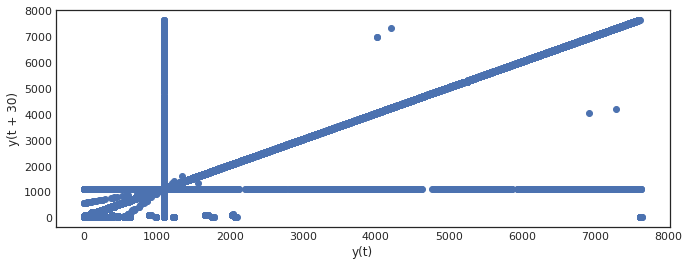

In [333]:
pd.plotting.lag_plot(df_ts['SQL Server, Buffer Manager: Page life expectancy(PLE)'],lag =30)

<AxesSubplot:xlabel='Date_Time'>

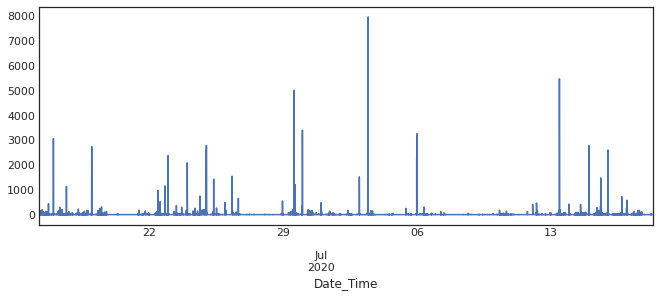

In [335]:
df_ts['SQL Server, Buffer Manager: Page reads/sec'].plot()

<AxesSubplot:xlabel='Date_Time'>

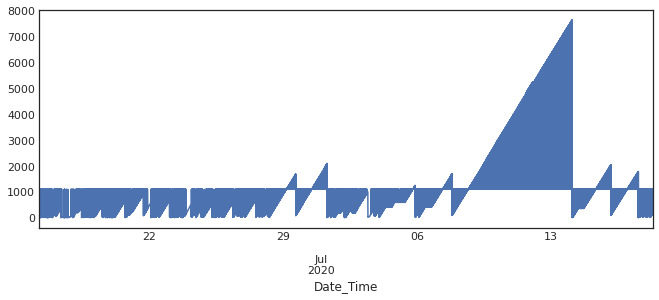

In [336]:
df_ts['SQL Server, Buffer Manager: Page life expectancy(PLE)'].plot()

# Pairplot


In [19]:
# sns.pairplot(df)

In [316]:
# df_ts[buffer_col]

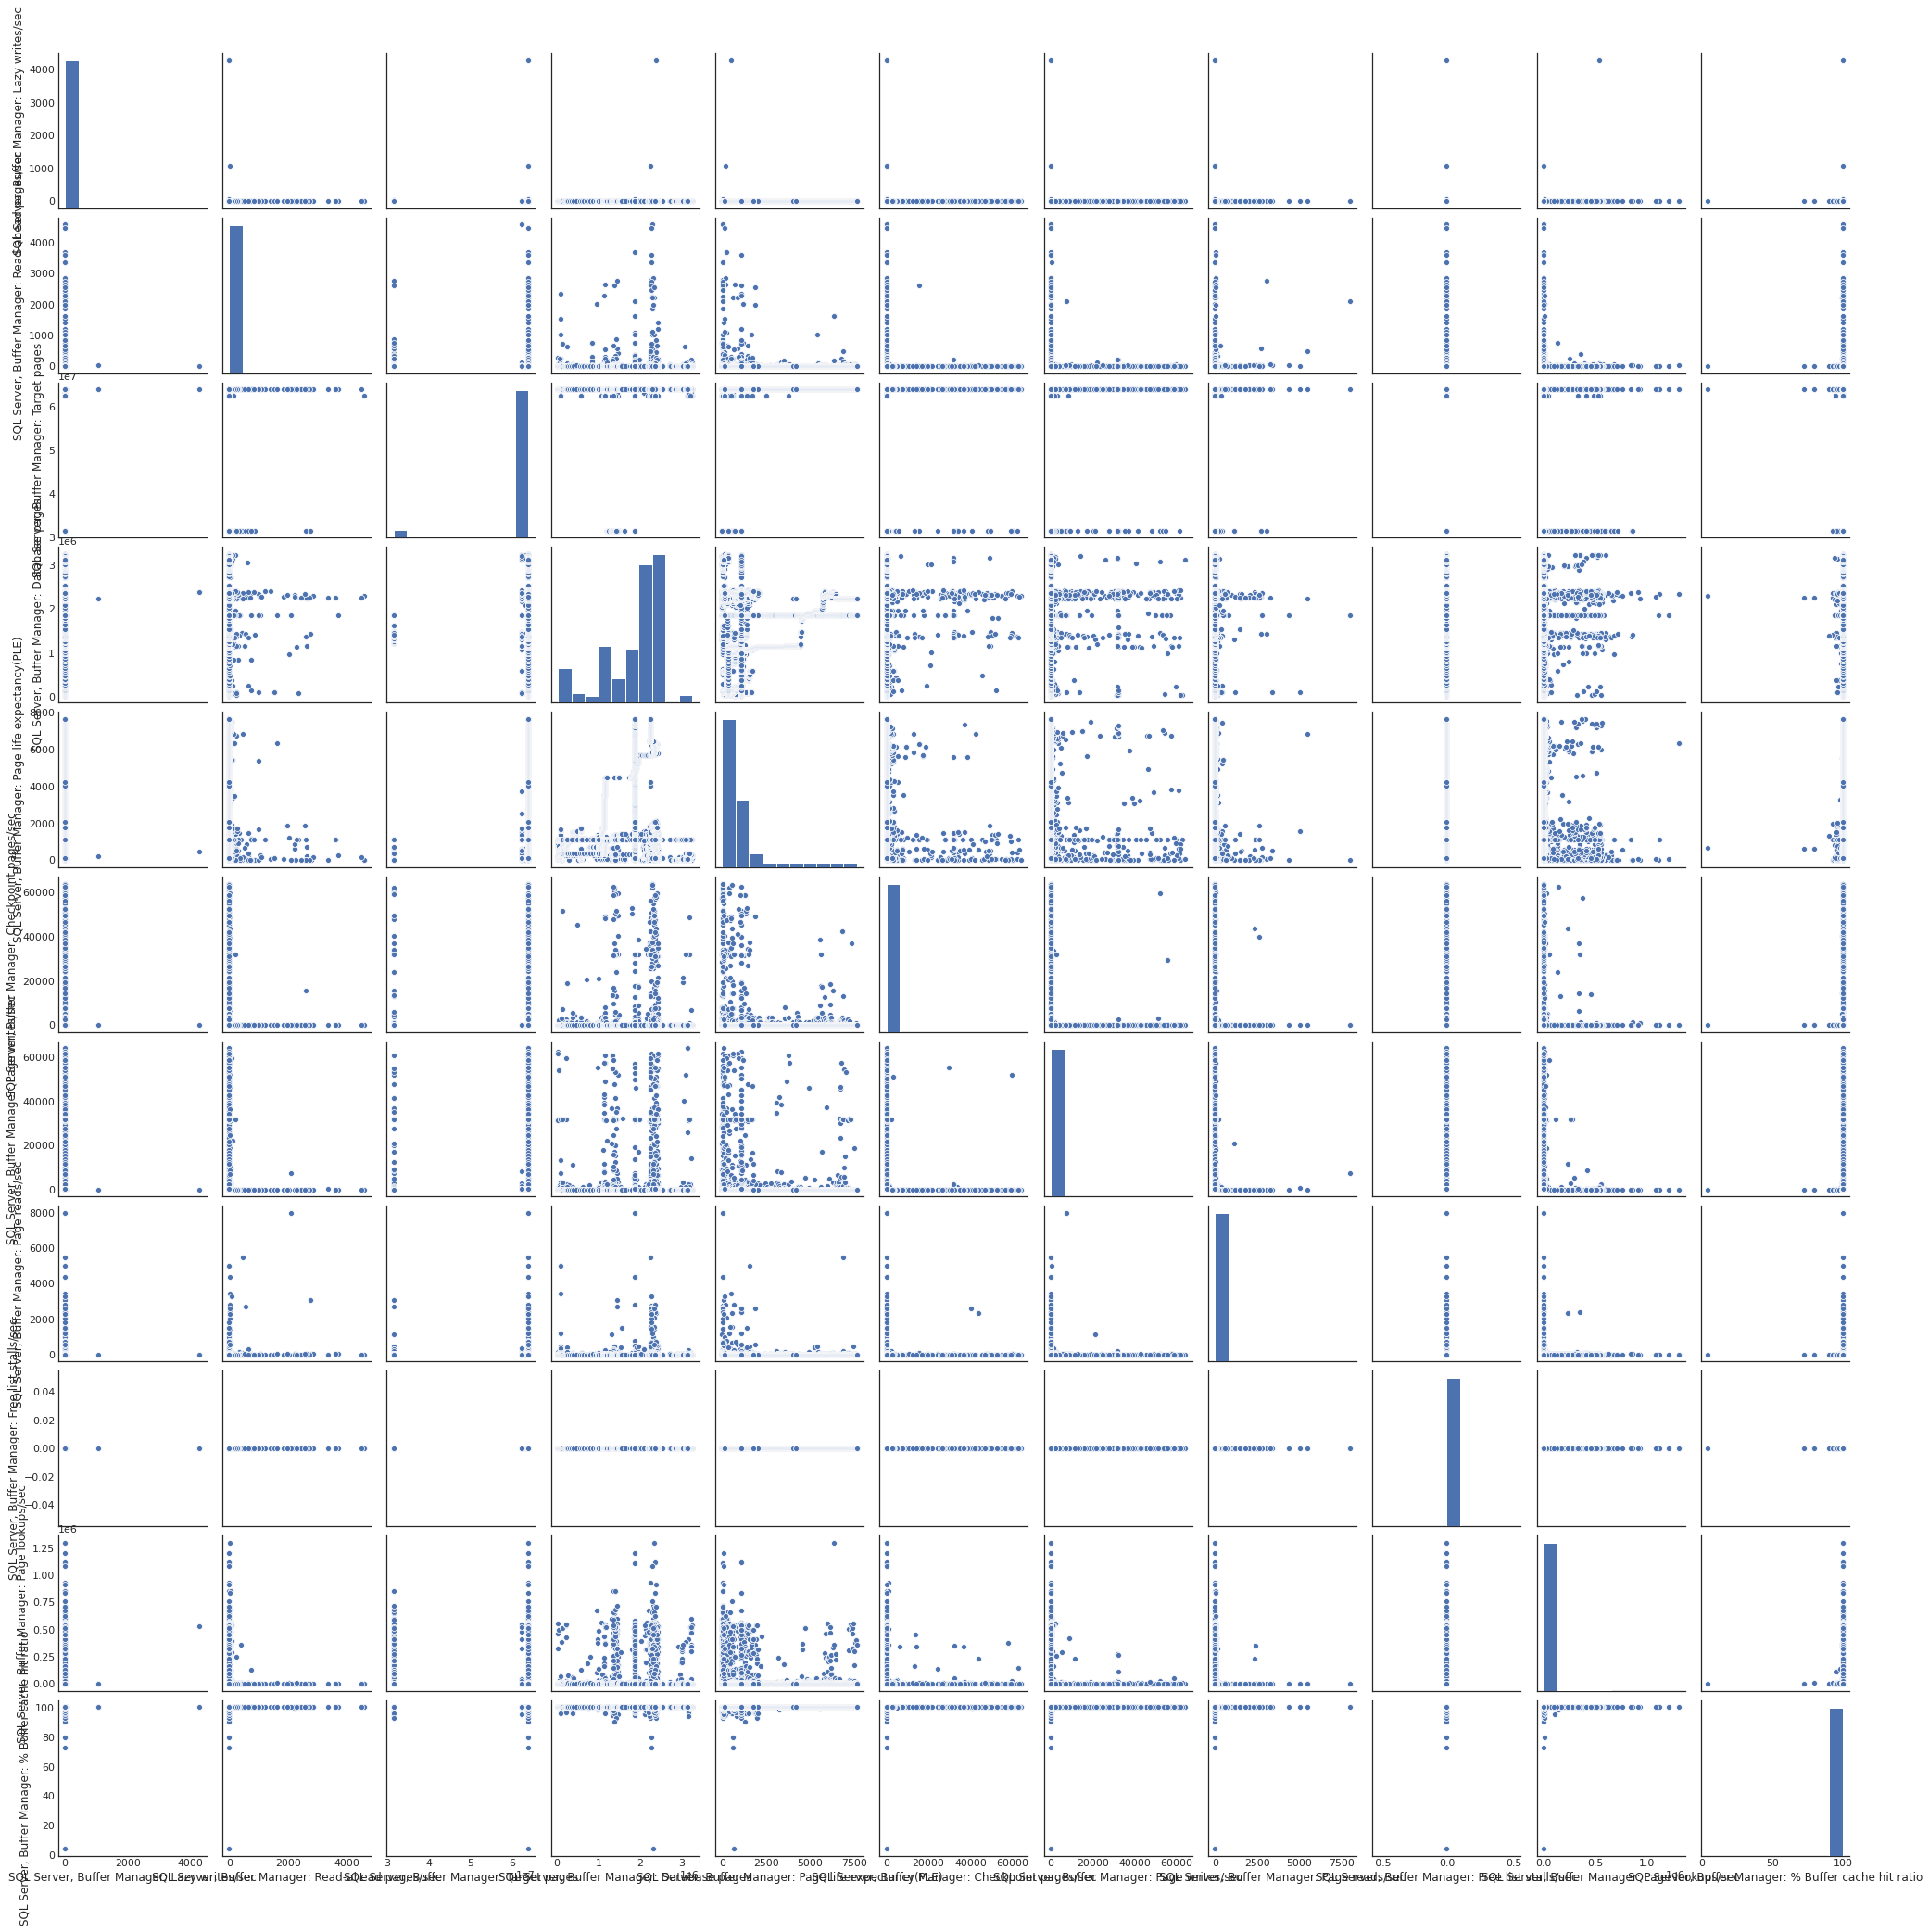

In [317]:
sns.pairplot(df_ts[buffer_col])

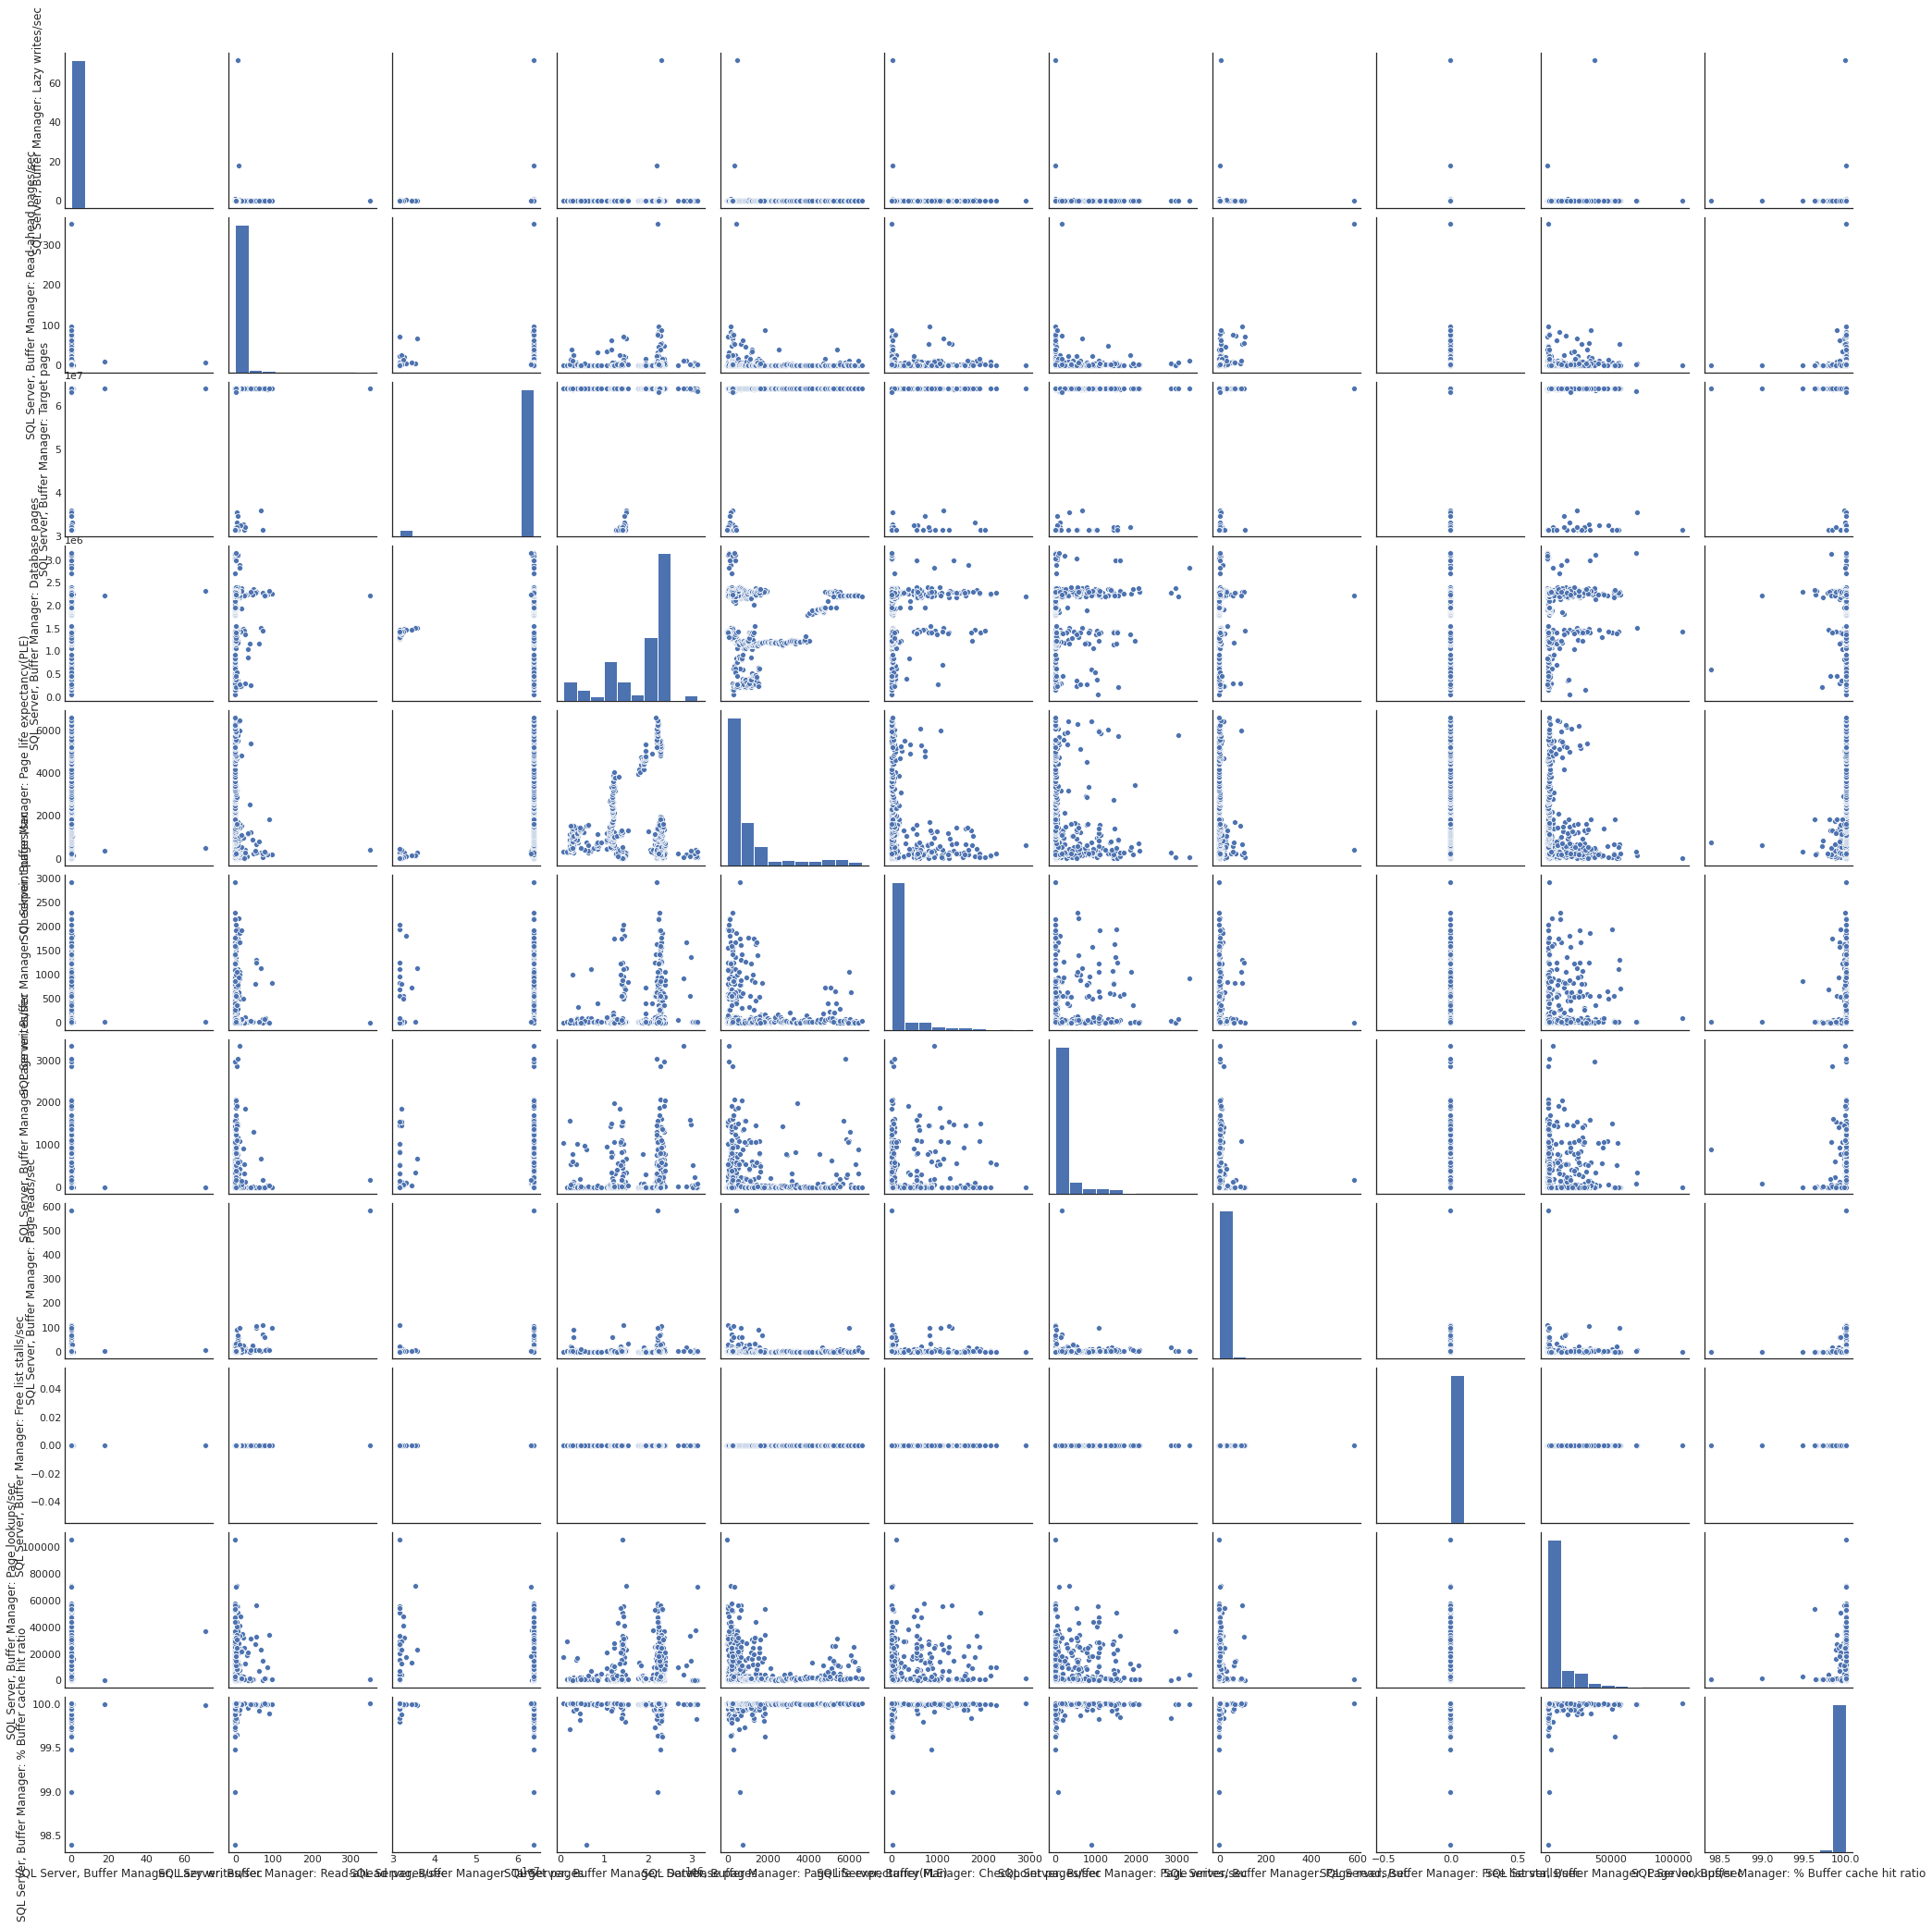

In [318]:
sns.pairplot(hourlydat[buffer_col])

# Decomposign all features

In [ ]:
df.head(2)

In [40]:
lst_of_columns = list(df.columns)

In [ ]:
df['Exact Date'] = pd.to_datetime(df['Date_Time'],unit = 's', errors='ignore')

In [ ]:
# df = df[['Date_Time', 'CPU usage [MHZ]']]

for col in lst_of_columns:
    df1 = df[['Date_Time', col]]
    df1 = df1.set_index('Date_Time')

    print("-"*21)
    print(col,"\n")
    
    print("-"*21)

    try:
        print("Addtive Model Decomposition")
        result = seasonal_decompose(df1, model='additive', freq= 5)#'multiplicative')
        result.plot()
        plt.show()
        print('-'*21)
    except:
        print("Can not decompose additive model ")
        pass

    try:
        print("Multiplicative Model Decomposition")
        result = seasonal_decompose(df1, model='multiplicative', freq= 5)
        result.plot()
        plt.show()
    except:
        print("Can not decompose multiplicative model")
        pass

In [83]:
# del df1

In [89]:
# df[['Date_Time', 'SQL Server, Buffer Manager: % Buffer cache hit ratio']]

df1 = df[['Date_Time', 'SQL Server, Buffer Manager: Page life expectancy(PLE)']]
          #'SQL Server, Buffer Manager: % Buffer cache hit ratio']]

In [90]:
df1.head()
df1['SQL Server, Buffer Manager: Page life expectancy(PLE)'].nunique()

26290

In [91]:
df1 = df1.set_index('Date_Time')
df1.head(2)

,"SQL Server, Buffer Manager: Page life expectancy(PLE)"
Date_Time,
2020-06-16 05:17:00,272.9546
2020-06-16 05:18:00,273.9381


<AxesSubplot:xlabel='Date_Time'>

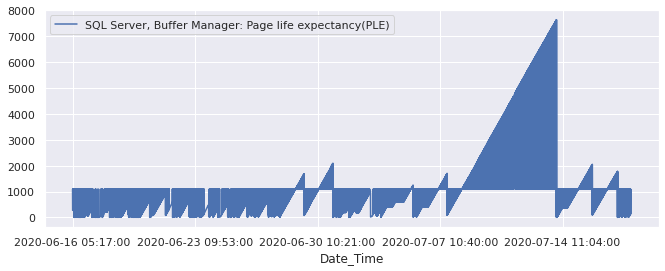

In [95]:
df1.plot()

In [92]:
result1 = seasonal_decompose(df1, model='additive', freq= 24)#'multiplicative')
result2 = seasonal_decompose(df1, model='multiplicative', freq= 24)#'multiplicative')

# Timeseries

- using df
- df has been processed, no missing values


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45553 entries, 2020-06-16 05:17:00 to 2020-07-18 07:44:00
Data columns (total 83 columns):
 #   Column                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                   --------------  -----  
 0   SQL Server, Errors: Errors/sec (DB Offline Errors)                                                       45553 non-null  float64
 1   SQL Server working set                                                                                   45553 non-null  float64
 2   Incoming network traffic on Amazon Elastic Network Adapter                                               45553 non-null  float64
 3   SQL Server, Access Methods: Forwarded Records per second                                                 45553 non-null  float64
 4   SQL Server, Buffer Manager: Lazy writes/sec            

# Featue to Forecast
- SQL Server, Buffer Manager: % Buffer cache hit ratio

In [337]:
df['SQL Server, Buffer Manager: % Buffer cache hit ratio'].nunique()

426

In [339]:
df['SQL Server, Buffer Manager: % Buffer cache hit ratio'].max()

100.0

In [340]:
df['SQL Server, Buffer Manager: % Buffer cache hit ratio'].min()

4.5296

In [343]:
df['SQL Server, Buffer Manager: % Buffer cache hit ratio'].value_counts()

100.000000    41691
99.985393      3307
99.999800        16
99.999700         8
96.551700         7
              ...  
99.991000         1
99.877300         1
99.346400         1
99.383700         1
98.232200         1
Name: SQL Server, Buffer Manager: % Buffer cache hit ratio, Length: 426, dtype: int64

<AxesSubplot:ylabel='Frequency'>

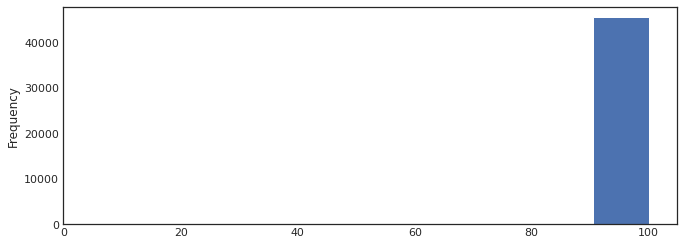

In [341]:
df['SQL Server, Buffer Manager: % Buffer cache hit ratio'].plot(kind='hist')

In [213]:
df[df['SQL Server, Buffer Manager: % Buffer cache hit ratio'] == df['SQL Server, Buffer Manager: % Buffer cache hit ratio'].min()]

,"SQL Server, Errors: Errors/sec (DB Offline Errors)",SQL Server working set,Incoming network traffic on Amazon Elastic Network Adapter,"SQL Server, Access Methods: Forwarded Records per second","SQL Server, Buffer Manager: Lazy writes/sec","SQL Server, Buffer Manager: Read-ahead pages/sec","SQL Server, Cache: Cache Object Counts","SQL Server, Cache: Cache Hit Ratio","SQL Server, Cache: Cache Objects in use","SQL Server, Locks: Lock Wait Time (Total)",...,"SQL Server, Errors: Errors/sec (Kill Connection Errors)","SQL Server, Memory Manager: Total Server Memory","SQL Server, Access Methods: Full Scans/sec",Processor load (15 min average),"SQL Server, Locks: Lock Requests/sec (Total)","SQL Server, Latches: Average Latch Wait Time","SQL Server, Statistics: Failed Auto-Params/sec","SQL Server, Buffer Manager: % Buffer cache hit ratio","SQL Server, Memory Manager: Maximum Workspace Memory","SQL Server, Access Methods: Work files created/sec"
Date_Time,,,,,,,,,,,,,,,,,,,,,
2020-06-21 12:01:00,0.0,89468000.0,28816.0,0.0,0.0,0.0,208.0,57.753,1.0,0.0,...,0.0,778452992.0,0.0,0.0001,54.1521,0.0,0.000022,4.5296,1.575936e+10,0.0


In [353]:
df[df['SQL Server, Buffer Manager: % Buffer cache hit ratio'] < 90][buffer_col]

,"SQL Server, Buffer Manager: Lazy writes/sec","SQL Server, Buffer Manager: Read-ahead pages/sec","SQL Server, Buffer Manager: Target pages","SQL Server, Buffer Manager: Database pages","SQL Server, Buffer Manager: Page life expectancy(PLE)","SQL Server, Buffer Manager: Checkpoint pages/sec","SQL Server, Buffer Manager: Page writes/sec","SQL Server, Buffer Manager: Page reads/sec","SQL Server, Buffer Manager: Free list stalls/sec","SQL Server, Buffer Manager: Page lookups/sec","SQL Server, Buffer Manager: % Buffer cache hit ratio"
Date_Time,,,,,,,,,,,
2020-06-21 12:01:00,0.0,0.0,63881216.0,2303594.0,672.5345,0.0,0.0000,0.0,0.0,0.000000,4.5296
2020-07-04 20:36:00,0.0,0.0,63881216.0,2257215.0,590.9015,0.0,0.0000,0.0,0.0,700.061700,72.5333
2020-07-04 20:40:00,0.0,0.0,63881216.0,2257277.0,590.9015,0.0,23.6311,0.0,0.0,7010.997108,79.9109


In [355]:
df['SQL Server, Buffer Manager: Page life expectancy(PLE)'].describe()

count    45553.000000
mean      1095.889318
std       1584.839247
min          0.100000
25%        125.191700
50%        543.242000
75%       1095.889318
max       7635.793500
Name: SQL Server, Buffer Manager: Page life expectancy(PLE), dtype: float64

# Model 

In [356]:
df_ts.index.name

'Date_Time'

In [362]:
df_mod = df_ts.reset_index()[['Date_Time','SQL Server, Buffer Manager: % Buffer cache hit ratio']].rename({'Date_Time':'ds','SQL Server, Buffer Manager: % Buffer cache hit ratio':'y'}, axis='columns') 

In [363]:
df_mod.head()

,ds,y
0,2020-06-16 05:17:00,100.0
1,2020-06-16 05:18:00,100.0
2,2020-06-16 05:19:00,100.0
3,2020-06-16 05:20:00,100.0
4,2020-06-16 05:21:00,100.0


In [364]:
m = Prophet(interval_width=0.95)
m.fit(df_mod)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [365]:
m.params

OrderedDict([('k', array([[0.00158331]])),
             ('m', array([[0.99974158]])),
             ('delta',
              array([[ 1.71036971e-03, -1.35431071e-03, -4.04152086e-03,
                      -5.03205311e-03,  7.27274055e-03,  2.86630638e-03,
                      -1.62193989e-03, -1.67815813e-03,  2.06714487e-03,
                       2.58231348e-03, -3.41789460e-03, -5.32688997e-03,
                       1.31685315e-03,  2.58876922e-03,  3.56045229e-04,
                      -3.13473862e-05, -2.85815772e-04,  4.43220877e-03,
                      -2.59018427e-03, -1.48856784e-03,  6.24488845e-04,
                       1.17157136e-04,  1.05871194e-03,  9.53811368e-04,
                      -5.15907726e-03]])),
             ('sigma_obs', array([[0.00507699]])),
             ('beta',
              array([[-2.83902929e-05,  3.64657968e-05,  3.78124646e-05,
                      -6.20826165e-05, -4.14916772e-05,  3.40448951e-05,
                       3.95896065e-06,  1.261

In [367]:
24*60

1440

In [370]:
df_mod.tail()

,ds,y
46223,2020-07-18 07:40:00,100.0
46224,2020-07-18 07:41:00,100.0
46225,2020-07-18 07:42:00,100.0
46226,2020-07-18 07:43:00,100.0
46227,2020-07-18 07:44:00,100.0


In [373]:

future = m.make_future_dataframe(periods=1440*7, freq='T')
future.tail()

,ds
56303,2020-07-25 07:40:00
56304,2020-07-25 07:41:00
56305,2020-07-25 07:42:00
56306,2020-07-25 07:43:00
56307,2020-07-25 07:44:00


In [374]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56303,2020-07-25 07:40:00,99.915403,98.803739,100.917369
56304,2020-07-25 07:41:00,99.915426,98.905305,100.890004
56305,2020-07-25 07:42:00,99.915448,98.928621,100.938395
56306,2020-07-25 07:43:00,99.915469,98.896636,100.923745
56307,2020-07-25 07:44:00,99.915489,98.844874,101.013008


In [380]:
forecast['yhat'].max()

100.0184607321974

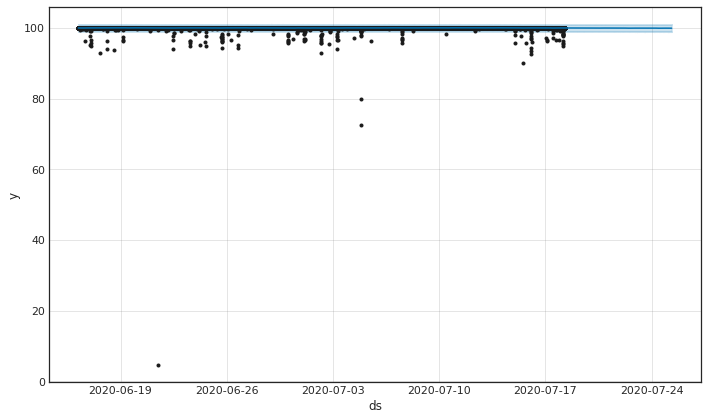

In [381]:
fig1 = m.plot(forecast)

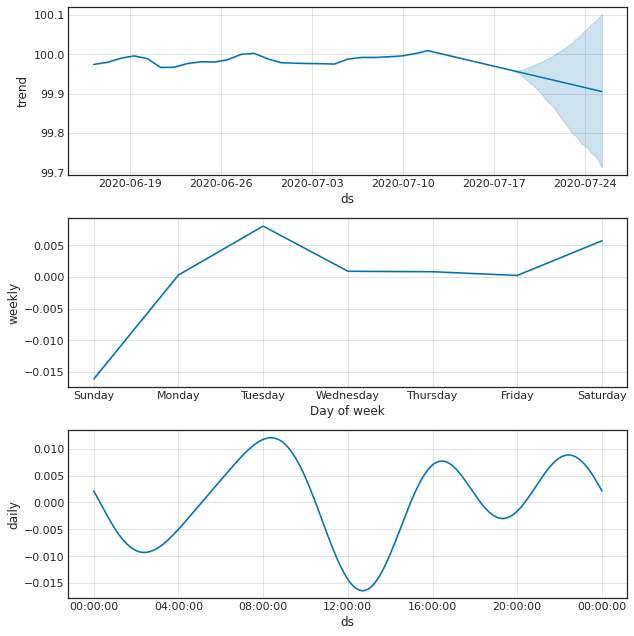

In [382]:
fig2 = m.plot_components(forecast)

In [383]:
df_aug = pd.read_csv("~/Zabbix/Data/SRV_Data/SRV_Processed/AUGUST/SRV-FR-SQLN-03BFC_AUG_Processed.csv")

In [398]:
df_aug.shape

(42648, 85)

In [397]:
df.shape

(45553, 83)

In [412]:
df_ts['SQL Server, Buffer Manager: % Buffer cache hit ratio'].describe()

count    46228.000000
mean        99.985580
std          0.507552
min          4.529600
25%        100.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: SQL Server, Buffer Manager: % Buffer cache hit ratio, dtype: float64

In [406]:
df_aug['SQL Server, Buffer Manager: % Buffer cache hit ratio'].describe()

count    42180.000000
mean        99.776015
std          2.232011
min         24.029500
25%        100.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: SQL Server, Buffer Manager: % Buffer cache hit ratio, dtype: float64

In [404]:
set(list(df.columns)) ^ set(list(df_aug.columns)) # Symmetric Difference

{'Processor load (1 min average)', 'Timestamp'}

In [417]:
df_ts[df_ts['SQL Server, Buffer Manager: % Buffer cache hit ratio'] < 90][buffer_col]

,"SQL Server, Buffer Manager: Lazy writes/sec","SQL Server, Buffer Manager: Read-ahead pages/sec","SQL Server, Buffer Manager: Target pages","SQL Server, Buffer Manager: Database pages","SQL Server, Buffer Manager: Page life expectancy(PLE)","SQL Server, Buffer Manager: Checkpoint pages/sec","SQL Server, Buffer Manager: Page writes/sec","SQL Server, Buffer Manager: Page reads/sec","SQL Server, Buffer Manager: Free list stalls/sec","SQL Server, Buffer Manager: Page lookups/sec","SQL Server, Buffer Manager: % Buffer cache hit ratio"
Date_Time,,,,,,,,,,,
2020-06-21 12:01:00,0.0,0.0,63881216.0,2303594.0,672.5345,0.0,0.0000,0.0,0.0,0.000000,4.5296
2020-07-04 20:36:00,0.0,0.0,63881216.0,2257215.0,590.9015,0.0,0.0000,0.0,0.0,700.061700,72.5333
2020-07-04 20:40:00,0.0,0.0,63881216.0,2257277.0,590.9015,0.0,23.6311,0.0,0.0,7010.997108,79.9109


In [419]:
df_aug[df_aug['SQL Server, Buffer Manager: % Buffer cache hit ratio'] < 90][buffer_col]

,"SQL Server, Buffer Manager: Lazy writes/sec","SQL Server, Buffer Manager: Read-ahead pages/sec","SQL Server, Buffer Manager: Target pages","SQL Server, Buffer Manager: Database pages","SQL Server, Buffer Manager: Page life expectancy(PLE)","SQL Server, Buffer Manager: Checkpoint pages/sec","SQL Server, Buffer Manager: Page writes/sec","SQL Server, Buffer Manager: Page reads/sec","SQL Server, Buffer Manager: Free list stalls/sec","SQL Server, Buffer Manager: Page lookups/sec","SQL Server, Buffer Manager: % Buffer cache hit ratio"
472,0.0000,0.0000,63881216.0,1961944.0,54.0275,0.0,0.0000,2945.0578,0.0,12196.5617,61.3161
626,408.6117,8.8613,63881216.0,1982886.0,4.6009,0.0,0.0000,0.0000,0.0,72.8601,89.3265
668,34.4693,0.0000,63881216.0,1974205.0,1.7337,0.0,0.0000,0.0000,0.0,0.0000,85.0613
701,279.6308,13.7845,63881216.0,1936316.0,1.2336,0.0,0.9846,2976.9216,0.0,254282.0838,51.8945
702,395.8029,28069.5581,63881216.0,1969311.0,1.0335,0.0,396.8099,3095.7826,0.0,12711.4646,63.3422
...,...,...,...,...,...,...,...,...,...,...,...
36338,0.0000,0.0000,63881216.0,1863537.0,1.6003,0.0,59.0807,0.0000,0.0,54211.3229,50.6355
36590,0.0000,0.0000,63881216.0,1843397.0,2.5172,0.0,5.9082,2166.1590,0.0,80893.6758,86.5304
38026,0.0000,0.0000,63881216.0,1872123.0,1.5837,0.0,706.9681,0.0000,0.0,447.0294,87.4563
38028,0.0000,0.0000,63881216.0,1903842.0,1.7837,0.0,2095.0426,0.0000,0.0,4.9231,83.3575


In [420]:
df_aug['SQL Server, Buffer Manager: Page life expectancy(PLE)'].describe()

count    42042.000000
mean       176.643482
std        289.857279
min          0.000000
25%         10.102000
50%         56.911400
75%        203.036425
max       1579.849200
Name: SQL Server, Buffer Manager: Page life expectancy(PLE), dtype: float64

In [421]:
df_ts['SQL Server, Buffer Manager: Page life expectancy(PLE)'].describe()

count    46228.000000
mean      1094.010863
std       1587.477229
min          0.100000
25%        122.474500
50%        537.249100
75%       1095.889318
max       7635.793500
Name: SQL Server, Buffer Manager: Page life expectancy(PLE), dtype: float64

In [440]:
# Case when df_ts['SQL Server, Buffer Manager: % Buffer cache hit ratio].min() occured

df_ts[df_ts['SQL Server, Buffer Manager: % Buffer cache hit ratio'] == df_ts['SQL Server, Buffer Manager: % Buffer cache hit ratio'].min()][buffer_col]

,"SQL Server, Buffer Manager: Lazy writes/sec","SQL Server, Buffer Manager: Read-ahead pages/sec","SQL Server, Buffer Manager: Target pages","SQL Server, Buffer Manager: Database pages","SQL Server, Buffer Manager: Page life expectancy(PLE)","SQL Server, Buffer Manager: Checkpoint pages/sec","SQL Server, Buffer Manager: Page writes/sec","SQL Server, Buffer Manager: Page reads/sec","SQL Server, Buffer Manager: Free list stalls/sec","SQL Server, Buffer Manager: Page lookups/sec","SQL Server, Buffer Manager: % Buffer cache hit ratio"
Date_Time,,,,,,,,,,,
2020-06-21 12:01:00,0.0,0.0,63881216.0,2303594.0,672.5345,0.0,0.0,0.0,0.0,0.0,4.5296


In [444]:
df_aug[buffer_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42648 entries, 0 to 42647
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   SQL Server, Buffer Manager: Lazy writes/sec            42090 non-null  float64
 1   SQL Server, Buffer Manager: Read-ahead pages/sec       41755 non-null  float64
 2   SQL Server, Buffer Manager: Target pages               41682 non-null  float64
 3   SQL Server, Buffer Manager: Database pages             42144 non-null  float64
 4   SQL Server, Buffer Manager: Page life expectancy(PLE)  42042 non-null  float64
 5   SQL Server, Buffer Manager: Checkpoint pages/sec       42165 non-null  float64
 6   SQL Server, Buffer Manager: Page writes/sec            41893 non-null  float64
 7   SQL Server, Buffer Manager: Page reads/sec             41944 non-null  float64
 8   SQL Server, Buffer Manager: Free list stalls/s

In [450]:
# df_mod.info()
# forecast.info()

In [457]:
# Diagonostics


from fbprophet.diagnostics import cross_validation
cv_results = cross_validation(model = m,initial = '26 days',  horizon='3 days')

INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-07-12 07:44:00 and 2020-07-15 07:44:00


In [460]:
cv_results.tail()
# [cv_results['ds'].str.contains('2020-06')]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
12955,2020-07-18 07:40:00,100.008497,99.013486,101.022330,100.0,2020-07-15 07:44:00
12956,2020-07-18 07:41:00,100.008563,99.002520,101.030952,100.0,2020-07-15 07:44:00
12957,2020-07-18 07:42:00,100.008628,99.010389,101.082735,100.0,2020-07-15 07:44:00
12958,2020-07-18 07:43:00,100.008692,98.932020,101.090284,100.0,2020-07-15 07:44:00
12959,2020-07-18 07:44:00,100.008756,98.954906,100.941217,100.0,2020-07-15 07:44:00


In [481]:
df_mod['ds'].max()

Timestamp('2020-07-18 07:44:00')

In [478]:
cv_results['ds'].max()

Timestamp('2020-07-18 07:44:00')

In [461]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(cv_results)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,0 days 07:12:00,0.082786,0.287726,0.027978,0.000289,0.000185,0.998457
1,0 days 07:13:00,0.082787,0.287727,0.027978,0.000289,0.000185,0.998457
2,0 days 07:14:00,0.082787,0.287728,0.027990,0.000289,0.000185,0.998457
3,0 days 07:15:00,0.082788,0.287729,0.028001,0.000289,0.000185,0.998457
4,0 days 07:16:00,0.082789,0.287730,0.028019,0.000289,0.000185,0.998457
...,...,...,...,...,...,...,...
3884,2 days 23:56:00,0.095089,0.308366,0.056421,0.000574,0.000164,0.991512
3885,2 days 23:57:00,0.095089,0.308365,0.056424,0.000574,0.000164,0.991512
3886,2 days 23:58:00,0.095088,0.308363,0.056428,0.000574,0.000164,0.991512
3887,2 days 23:59:00,0.095087,0.308361,0.056420,0.000574,0.000164,0.991512


# Connecting to Postgresql

In [465]:
import postgres

In [469]:
db = Postgres.Postgres()

In [ ]:
db = Postgres.Postgres

In [470]:
import psycopg2

In [521]:
connection = psycopg2.connect(user = "test_user",
                                  password = "test_user",
                                  host = "127.0.0.1",
                                  port = "5432",
                                  database = "postgres")


In [502]:

cursor = connection.cursor()
# Print PostgreSQL Connection properties
print ( connection.get_dsn_parameters(),"\n")

InterfaceError: connection already closed

In [500]:
cursor.execute("SELECT count(*) from srv_fr_sqln_03bfc_min_max_22")
rows = cursor.fetchall()
# for row in rows:
#    print "ID = ", row[0]
#    print "NAME = ", row[1]
#    print "ADDRESS = ", row[2]
#    print "SALARY = ", row[3], "\n"

print(rows)
connection.close()

[(45553,)]


In [485]:
forecast.tail(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
56306,2020-07-25 07:43:00,99.905065,98.896636,100.923745,99.712423,100.101379,0.010404,0.010404,0.010404,0.011149,0.011149,0.011149,-0.000745,-0.000745,-0.000745,0.0,0.0,0.0,99.915469
56307,2020-07-25 07:44:00,99.905059,98.844874,101.013008,99.712392,100.101401,0.010430,0.010430,0.010430,0.011193,0.011193,0.011193,-0.000763,-0.000763,-0.000763,0.0,0.0,0.0,99.915489


In [483]:
cv_results.columns

Index(['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'y', 'cutoff'], dtype='object')

In [558]:
# Creating a table for forecast 
connection = psycopg2.connect(user = "test_user",
                                  password = "test_user",
                                  host = "127.0.0.1",
                                  port = "5432",
                                  database = "postgres")


cursor = connection.cursor()
cursor.execute('''CREATE TABLE srv_fr_sqln_03bfc_buffer_cache_forecast(
    "date_time" timestamp  NULL,
       "buffer_cache_hit_ratio_forecast" numeric NULL,
        "buffer_cache_hit_ratio_forecast_Upper" numeric NULL,
        "buffer_cache_hit_ratio_forecastt_lower" numeric NULL)
        ;''')
print("Table created successfully")

connection.commit()
connection.close()

Table created successfully


In [506]:
df_forecast = forecast[['ds','yhat','yhat_upper','yhat_lower']]

In [515]:
df_forecast.iloc[0]['yhat']

99.98031418507736

In [516]:
df_forecast.columns

Index(['ds', 'yhat', 'yhat_upper', 'yhat_lower'], dtype='object')

In [556]:
df_forecast.columns = ['date_time', 'buffer_cache_hit_ratio_forecast', 'buffer_cache_hit_ratio_forecast_upper', 'buffer_cache_hit_ratio_forecast_lower' ]

In [557]:
df_forecast.columns

Index(['date_time', 'buffer_cache_hit_ratio_forecast',
       'buffer_cache_hit_ratio_forecast_upper',
       'buffer_cache_hit_ratio_forecast_lower'],
      dtype='object')

## Bulk Insert Postgres

In [524]:
from io import StringIO

## StringIO method - Bulk Insert

In [564]:
conn = psycopg2.connect(user = "test_user",
                                  password = "test_user",
                                  host = "127.0.0.1",
                                  port = "5432",
                                  database = "postgres")



In [565]:
# Initialize a string buffer
sio = StringIO()
sio.write(df_forecast.to_csv(index=None, header=None))  # Write the Pandas DataFrame as a csv to the buffer
sio.seek(0)  # Be sure to reset the position to the start of the stream

# Copy the string buffer to the database, as if it were an actual file
with conn.cursor() as c:
    c.copy_from(sio, "srv_fr_sqln_03bfc_buffer_cache_forecast", columns=df_forecast.columns, sep=',')
    conn.commit()

#### Creating Actual Table for Buffer


In [572]:
# Creating a table for forecast 
connection = psycopg2.connect(user = "test_user",
                                  password = "test_user",
                                  host = "127.0.0.1",
                                  port = "5432",
                                  database = "postgres")


cursor = connection.cursor()
cursor.execute('''CREATE TABLE srv_fr_sqln_03bfc_buffer_cache_actual(
    "date_time" timestamp  NULL,
       "buffer_cache_hit_ratio_actual" numeric NULL
        )
        ;''')
print("Table created successfully")

connection.commit()
connection.close()

Table created successfully


In [567]:
df_mod

,ds,y
0,2020-06-16 05:17:00,100.0
1,2020-06-16 05:18:00,100.0
2,2020-06-16 05:19:00,100.0
3,2020-06-16 05:20:00,100.0
4,2020-06-16 05:21:00,100.0
...,...,...
46223,2020-07-18 07:40:00,100.0
46224,2020-07-18 07:41:00,100.0
46225,2020-07-18 07:42:00,100.0
46226,2020-07-18 07:43:00,100.0


In [573]:
df_buffer_actual = pd.DataFrame(data = df_mod.values, columns = ['date_time', 'buffer_cache_hit_ratio_actual'])

In [574]:
conn = psycopg2.connect(user = "test_user",
                                  password = "test_user",
                                  host = "127.0.0.1",
                                  port = "5432",
                                  database = "postgres")

# Initialize a string buffer
sio = StringIO()
sio.write(df_buffer_actual.to_csv(index=None, header=None))  # Write the Pandas DataFrame as a csv to the buffer
sio.seek(0)  # Be sure to reset the position to the start of the stream

# Copy the string buffer to the database, as if it were an actual file
with conn.cursor() as c:
    c.copy_from(sio, "srv_fr_sqln_03bfc_buffer_cache_actual", columns=df_buffer_actual.columns, sep=',')
    conn.commit()